### it has been tried to divide the share of the load input data in this thesis base on the real share of the total load in germany in the year 2023.
###### Der Stromverbrauch verteilte sich 2023 wie folgt: Industrie: 40,0 %, Private Haushalte: 28,0 %, Kleinverbraucher – hierzu zählen Handel, Gewerbe, Dienstleistungen sowie öffentliche Einrichtungen: 26,7 % und Verkehr: 3,3 %  (QUELLE : https://www.weltenergierat.de/energie-fuer-deutschland-2024/energie-in-deutschland-zahlen-und-fakten)



# Load data generation from BDEW standard last profile(SLP)
## 12 general businesses
###### aggregated 12 general businesses with annual power consumption of 12000(+- 20% deviation from standard last profile for each obtained from SLP published by BDEW)
###### source for generation of time serie  : https://demandlib.readthedocs.io/
###### source for BDEW : https://www.bdew.de/media/documents/1999_Repraesentative-VDEW-Lastprofile.pdf

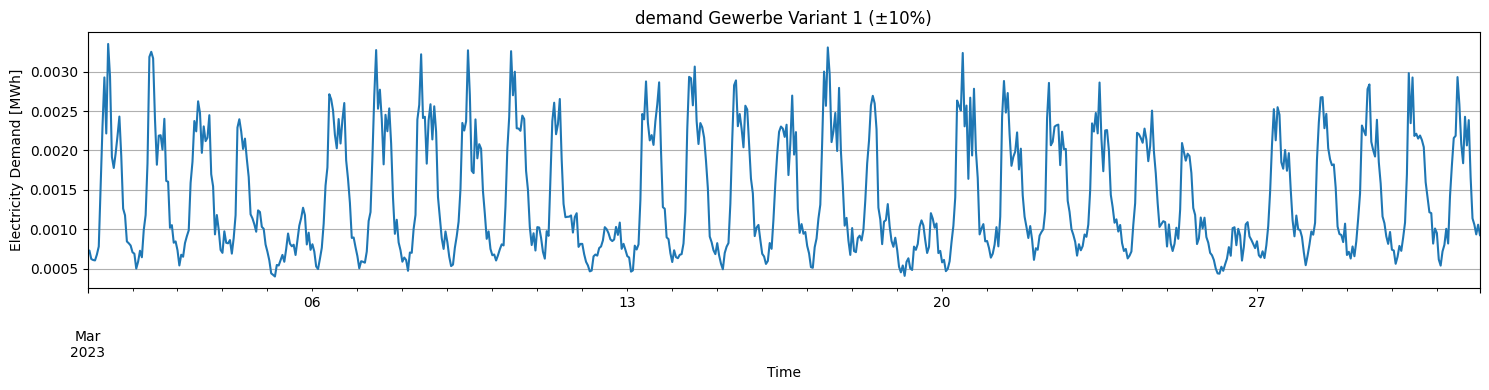

,tot_demand_Gewerbe_variants_[MWh]
2023-03-01 00:00:00,0.008947
2023-03-01 01:00:00,0.007373
2023-03-01 02:00:00,0.006833
2023-03-01 03:00:00,0.007078
2023-03-01 04:00:00,0.008424
...,...
2023-03-31 19:00:00,0.013780
2023-03-31 20:00:00,0.012600
2023-03-31 21:00:00,0.011896
2023-03-31 22:00:00,0.011621


In [1]:

from demandlib.bdew import ElecSlp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

e_slp = ElecSlp(year=2023)                     # general business
g0_annual = 12000

profile_g0 = e_slp.get_scaled_profiles({"g0": g0_annual})

demand_Gewerbe = profile_g0["g0"].resample("1h").sum()
demand_Gewerbe = demand_Gewerbe["2023-03-01":"2023-03-31"] / 1000
demand_Gewerbe= demand_Gewerbe.to_frame(name="Demand [MWh]")
#display(demand_Gewerbe.sum())

np.random.seed(42)

#  Generate 12 varied profiles
gewerbe_variants_profiles = []

for i in range(12):
    variation = np.random.uniform(0.8, 1.2, size=len(demand_Gewerbe))
    modified_values = demand_Gewerbe["Demand [MWh]"].values * variation
    
    df_variant = pd.DataFrame(modified_values, index=demand_Gewerbe.index, columns=[f"demand_Gewerbe_{i+1}_[MWh]"])
    
    gewerbe_variants_profiles.append(df_variant)

all_gewerbe_variants = pd.concat(gewerbe_variants_profiles, axis=1)

all_gewerbe_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Gewerbe Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Gewerbe = all_gewerbe_variants.sum(axis=1).to_frame(name="tot_demand_Gewerbe_variants_[MWh]")
display(tot_Gewerbe)
#all_gewerbe_variants.head(5)

# Load data generation from BDEW standard last profile(SLP)
## 10 Business on weekdays 8 a.m. - 6 p.m.
###### aggregated 10 Business on weekdays 8 a.m. - 6 p.m. with annual power consumption of 6000(+- 20% deviation from standard last profile for each, obtained from SLP published by BDEW)
###### source for generation of time serie  : https://demandlib.readthedocs.io/
###### source for BDEW : https://www.bdew.de/media/documents/1999_Repraesentative-VDEW-Lastprofile.pdf

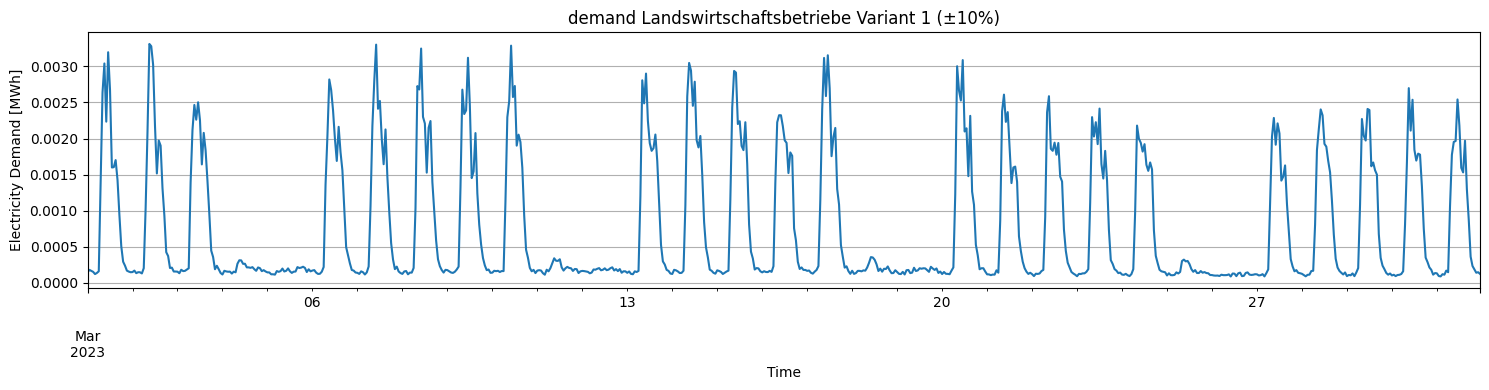

,tot_demand_Landswirtschaftsbetriebe_variants_[MWh]
2023-03-01 00:00:00,0.001588
2023-03-01 01:00:00,0.001561
2023-03-01 02:00:00,0.001568
2023-03-01 03:00:00,0.001444
2023-03-01 04:00:00,0.001425
...,...
2023-03-31 19:00:00,0.002345
2023-03-31 20:00:00,0.001904
2023-03-31 21:00:00,0.001500
2023-03-31 22:00:00,0.001370


In [2]:


from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)            # Business on weekdays 8 a.m. - 6 p.m.
g1_annual = 6000

profile_g1 = e_slp.get_scaled_profiles({"g1": g1_annual})

demand_Landswirtschaftsbetriebe = profile_g1["g1"].resample("1h").sum()
demand_Landswirtschaftsbetriebe = demand_Landswirtschaftsbetriebe["2023-03-01":"2023-03-31"] / 1000
demand_Landswirtschaftsbetriebe = demand_Landswirtschaftsbetriebe.to_frame(name="Demand [MWh]")
#demand_Landswirtschaftsbetriebe


np.random.seed(42)

#  Generate 12 varied profiles
Landswirtschaftsbetriebe_variants_profiles = []

for i in range(10):
    variation2 = np.random.uniform(0.8, 1.2, size=len(demand_Landswirtschaftsbetriebe))
    modified_values2 = demand_Landswirtschaftsbetriebe["Demand [MWh]"].values * variation2
    
    df_variant2 = pd.DataFrame(modified_values2, index=demand_Landswirtschaftsbetriebe.index, columns=[f"demand_Landswirtschaftsbetriebe_{i+1}_[MWh]"])
    
    Landswirtschaftsbetriebe_variants_profiles.append(df_variant2)

all_Landswirtschaftsbetriebe_variants = pd.concat(Landswirtschaftsbetriebe_variants_profiles, axis=1)

all_Landswirtschaftsbetriebe_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Landswirtschaftsbetriebe Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Landswirtschaftsbetriebe = all_Landswirtschaftsbetriebe_variants.sum(axis=1).to_frame(name="tot_demand_Landswirtschaftsbetriebe_variants_[MWh]")
display(tot_Landswirtschaftsbetriebe)
#all_Landswirtschaftsbetriebe_variants.head(5)

# Load data generation from BDEW standard last profile(SLP)
## 14 Continuous business
###### aggregated 14 Continuous business with annual power consumption of 25000(+- 20% deviation from standard last profile for each, obtained from SLP published by BDEW)
###### source for generation of time serie  : https://demandlib.readthedocs.io/
###### source for BDEW : https://www.bdew.de/media/documents/1999_Repraesentative-VDEW-Lastprofile.pdf

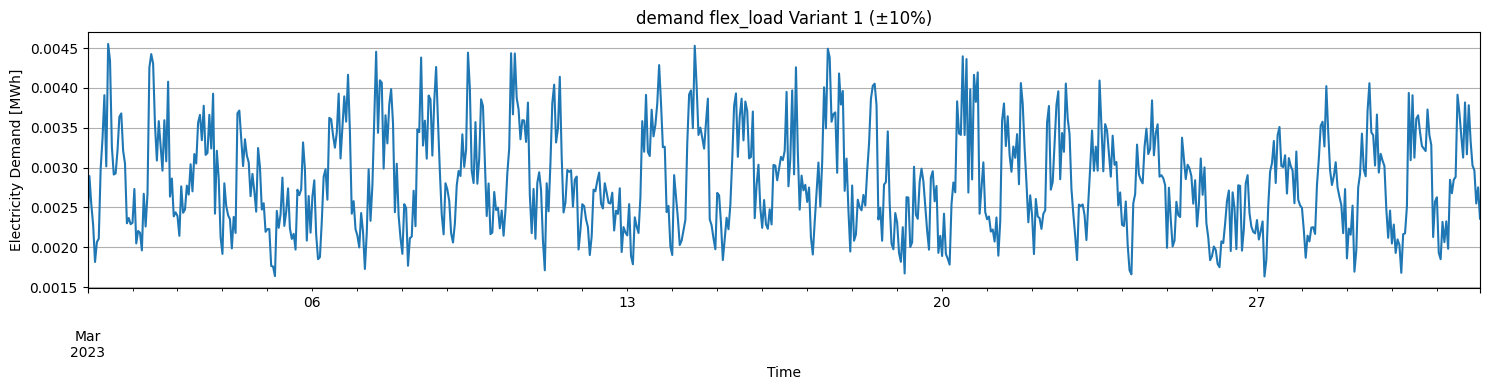

,tot_demand_flex_load_variants_[MWh]
2023-03-01 00:00:00,0.033352
2023-03-01 01:00:00,0.034229
2023-03-01 02:00:00,0.032353
2023-03-01 03:00:00,0.030626
2023-03-01 04:00:00,0.029558
...,...
2023-03-31 19:00:00,0.042981
2023-03-31 20:00:00,0.041250
2023-03-31 21:00:00,0.038039
2023-03-31 22:00:00,0.035602


In [3]:

from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)
g3_annual = 25000
profile_g3 = e_slp.get_scaled_profiles({"g3": g3_annual})   #Continuous business

demand_flex_load = profile_g3["g3"].resample("1h").sum()
demand_flex_load = demand_flex_load["2023-03-01":"2023-03-31"] / 1000
demand_flex_load = demand_flex_load.to_frame(name="Demand [MWh]")
#demand_flex_load

np.random.seed(42)

#  Generate 12 varied profiles
flex_load_variants_profiles = []

for i in range(14):
    variation3 = np.random.uniform(0.8, 1.2, size=len(demand_flex_load))
    modified_values3 = demand_flex_load["Demand [MWh]"].values * variation3
    
    df_variant3 = pd.DataFrame(modified_values3, index=demand_flex_load.index, columns=[f"demand_flex_load_{i+1}_[MWh]"])
    
    flex_load_variants_profiles.append(df_variant3)

all_flex_load_variants = pd.concat(flex_load_variants_profiles, axis=1)

all_flex_load_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand flex_load Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_flex_load = all_flex_load_variants.sum(axis=1).to_frame(name="tot_demand_flex_load_variants_[MWh]")
display(tot_flex_load)
#all_flex_load_variants.head(5)

# Load data generation from BDEW standard last profile(SLP)
## 25 Household
###### aggregated 25 Household with annual power consumption of 6000(+- 20% deviation from standard last profile for each, obtained from SLP published by BDEW)
###### source for generation of time serie  : https://demandlib.readthedocs.io/
###### source for BDEW : https://www.bdew.de/media/documents/1999_Repraesentative-VDEW-Lastprofile.pdf

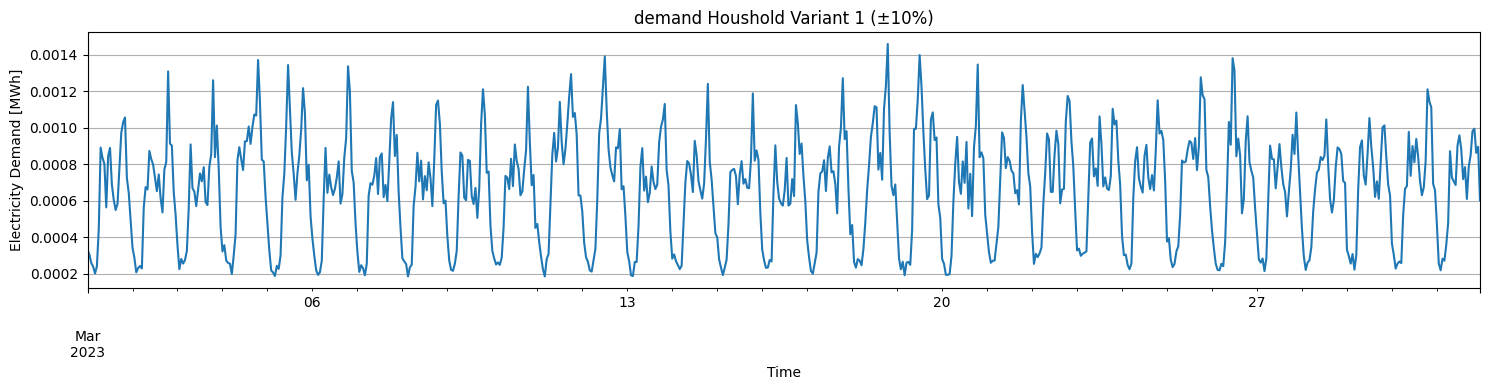

,tot_demand_Houshold_variants_[MWh]
2023-03-01 00:00:00,0.008843
2023-03-01 01:00:00,0.006443
2023-03-01 02:00:00,0.005966
2023-03-01 03:00:00,0.005805
2023-03-01 04:00:00,0.005831
...,...
2023-03-31 19:00:00,0.025631
2023-03-31 20:00:00,0.024456
2023-03-31 21:00:00,0.023249
2023-03-31 22:00:00,0.020712


In [4]:

from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)
h0_annual = 6000
# gets 15-min energy values, summing to annual total
profile_h0 = e_slp.get_scaled_profiles({"h0": h0_annual})
# rename and convert by hour
demand_Houshold = profile_h0["h0"].resample("1h").sum()
demand_Houshold = demand_Houshold["2023-03-01":"2023-03-31"] / 1000
demand_Houshold = demand_Houshold.to_frame(name="Demand [MWh]")
#demand_Houshold

np.random.seed(42)

#  Generate 12 varied profiles
Houshold_variants_profiles = []

for i in range(25):
    variation4 = np.random.uniform(0.8, 1.2, size=len(demand_Houshold))
    modified_values4 = demand_Houshold["Demand [MWh]"].values * variation4
    
    df_variant4 = pd.DataFrame(modified_values4, index=demand_Houshold.index, columns=[f"demand_Houshold_{i+1}_[MWh]"])
    
    Houshold_variants_profiles.append(df_variant4)

all_Houshold_variants = pd.concat(Houshold_variants_profiles, axis=1)

all_Houshold_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Houshold Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Houshold = all_Houshold_variants.sum(axis=1).to_frame(name="tot_demand_Houshold_variants_[MWh]")
display(tot_Houshold)
#all_Houshold_variants.head(5)


# Load data generation from BDEW standard last profile(SLP)
## 20 dynamic households 
###### aggregated 20  dynamic Household with annual power consumption of 6000(+- 20% deviation from standard last profile for each, obtained from SLP published by BDEW)
###### source for generation of time serie  : https://demandlib.readthedocs.io/
###### source for BDEW : https://www.bdew.de/media/documents/1999_Repraesentative-VDEW-Lastprofile.pdf

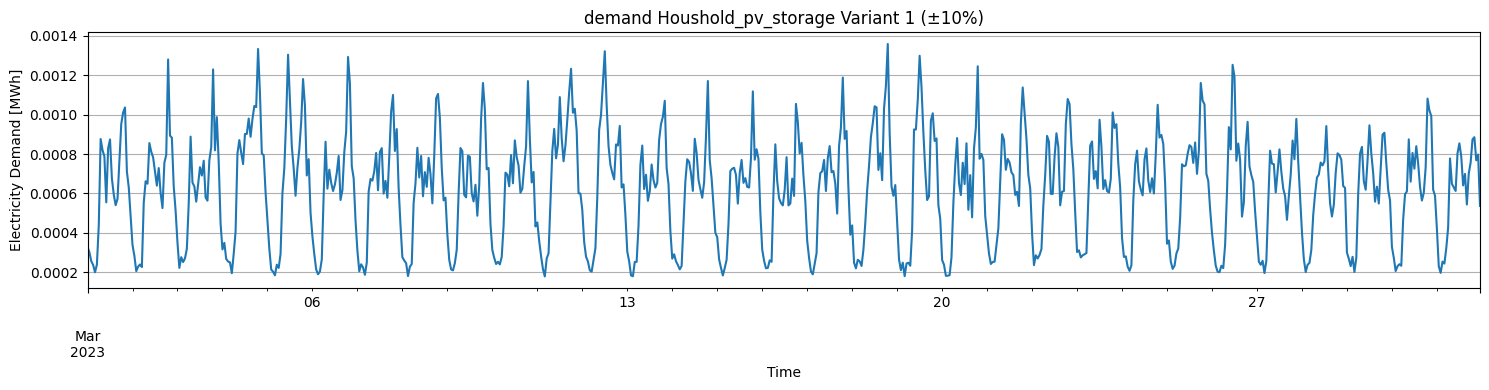

,tot_demand_Houshold_pv_storage_variants_[MWh]
2023-03-01 00:00:00,0.006949
2023-03-01 01:00:00,0.005094
2023-03-01 02:00:00,0.004668
2023-03-01 03:00:00,0.004521
2023-03-01 04:00:00,0.004555
...,...
2023-03-31 19:00:00,0.017808
2023-03-31 20:00:00,0.017515
2023-03-31 21:00:00,0.016515
2023-03-31 22:00:00,0.014665


In [5]:

from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)
h0_dyn_annual = 5000
# gets 15-min energy values, summing to annual total
profile_h0_dyn = e_slp.get_scaled_profiles({"h0_dyn": h0_dyn_annual})
# rename and convert by hour
demand_Houshold_pv_storage = profile_h0_dyn["h0_dyn"].resample("1h").sum()
demand_Houshold_pv_storage = demand_Houshold_pv_storage["2023-03-01":"2023-03-31"] / 1000
demand_Houshold_pv_storage = demand_Houshold_pv_storage.to_frame(name="Demand [MWh]")
#demand_Houshold_pv_storage

np.random.seed(42)

#  Generate 12 varied profiles
Houshold_pv_storage_variants_profiles = []

for i in range(20):
    variation5 = np.random.uniform(0.8, 1.2, size=len(demand_Houshold_pv_storage))
    modified_values5 = demand_Houshold_pv_storage["Demand [MWh]"].values * variation5
    
    df_variant5 = pd.DataFrame(modified_values5, index=demand_Houshold_pv_storage.index, columns=[f"demand_Houshold_pv_storage_{i+1}_[MWh]"])
    
    Houshold_pv_storage_variants_profiles.append(df_variant5)

all_Houshold_pv_storage_variants = pd.concat(Houshold_pv_storage_variants_profiles, axis=1)

all_Houshold_pv_storage_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Houshold_pv_storage Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Houshold_pv_storage = all_Houshold_pv_storage_variants.sum(axis=1).to_frame(name="tot_demand_Houshold_pv_storage_variants_[MWh]")
display(tot_Houshold_pv_storage)

#all_Houshold_pv_storage_variants.head(5)

# total demands(except EVs)

In [6]:
tot_demand = tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"] + tot_Houshold["tot_demand_Houshold_variants_[MWh]"] + tot_flex_load["tot_demand_flex_load_variants_[MWh]"] + tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"]+ tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"]
tot_demand = tot_demand.to_frame(name="Demand [MWh]")
tot_demand

,Demand [MWh]
2023-03-01 00:00:00,0.059680
2023-03-01 01:00:00,0.054700
2023-03-01 02:00:00,0.051388
2023-03-01 03:00:00,0.049474
2023-03-01 04:00:00,0.049793
...,...
2023-03-31 19:00:00,0.102545
2023-03-31 20:00:00,0.097726
2023-03-31 21:00:00,0.091198
2023-03-31 22:00:00,0.083970


# total simulated demand on march 2023(except EVs)

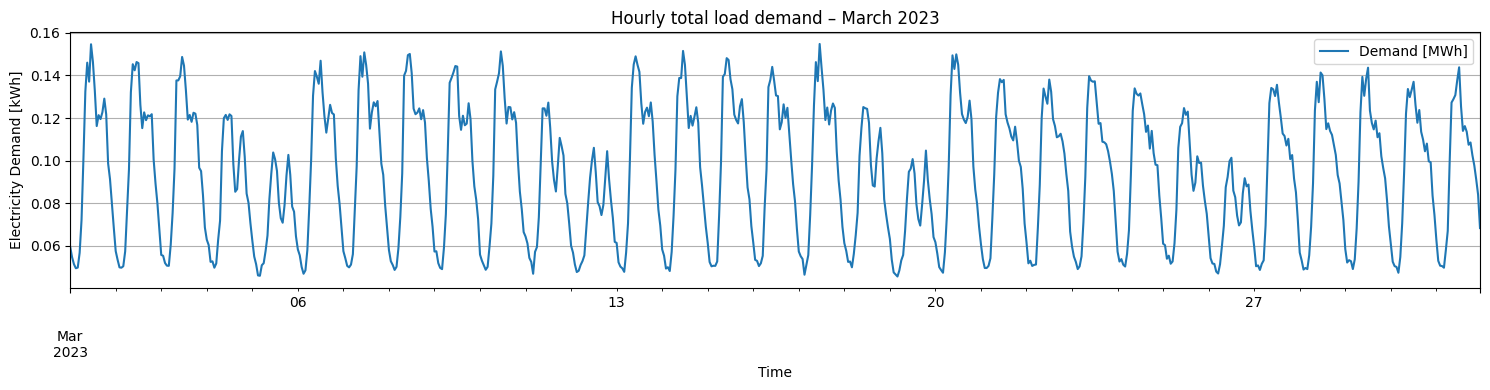

In [7]:
plt.figure(figsize=(15, 4))
tot_demand["Demand [MWh]"].plot(legend=True)
plt.title("Hourly total load demand – March 2023")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [kWh]")
plt.grid(True)
plt.tight_layout()
plt.show()

# building the Network and time horizon
###### Building the network in hourly resolution on march 2023

In [8]:
import pypsa
import pandas as pd

net = pypsa.Network()

net.set_snapshots(pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h"))

# Bus definition 

In [9]:

net.add("Bus", "grid")
net.add("Bus","solar_bus")
net.add("Bus","demand_Gewerbe")
net.add("Bus","houshold")
net.add("Bus","houshold_pv_storage")
net.add("Bus","Landswirtschaftsbetriebe")
net.add("Bus", "battery_bus")
net.add("Bus","flex_load")
net.add("Bus","Biomass")


Index(['Biomass'], dtype='object')

# solar PV simulation
#### solar generation data is retrieved from PVGIS published by European commission with this properties for march 2023 in hourly resolution:
###### "Latitude (decimal degrees):	52.481"
###### "Longitude (decimal degrees):	13.393"	
###### "Elevation (m):	51"
###### "Radiation database:	PVGIS-SARAH3"
###### Slope: 40 deg. (optimum)
###### Azimuth: -7 deg. (optimum)
###### "Nominal power of the PV system (CdTe) (kWp):	400.0"
###### System losses (%):	14.0"
###### source:  https://re.jrc.ec.europa.eu/pvg_tools/en/tools.html
####  Aproximate PV sizing based on this source https://www.wegatech.de/ratgeber/photovoltaik/planung-und-installation/dimensionierung-pv-anlage/:  is :Strombedarf mal 2,5 geteilt durch 1.000 kWh/kWp

In [10]:
			
solar_gen = pd.read_csv("solar_simulated_march_2023.csv", header=None, names=["power[W]"])
solar_gen = solar_gen / 1000000
solar_gen.index = net.snapshots
solar_gen.head(20)


,power[W]
snapshot,
2023-03-01 00:00:00,0.000000
2023-03-01 01:00:00,0.000000
2023-03-01 02:00:00,0.000000
2023-03-01 03:00:00,0.000000
2023-03-01 04:00:00,0.000000
2023-03-01 05:00:00,0.000000
2023-03-01 06:00:00,0.000000
2023-03-01 07:00:00,0.102680
2023-03-01 08:00:00,0.199752


In [11]:
tot_Houshold_pv_storage.index = net.snapshots
tot_Houshold.index = net.snapshots
tot_flex_load.index = net.snapshots
tot_Landswirtschaftsbetriebe.index = net.snapshots
tot_Gewerbe.index = net.snapshots
tot_demand.index = net.snapshots

# Electricity price(marginal cost of grid generator)
###### the wholesale market clearing electricity price in march 2023 are used as marginal cost of the "grid_generator" to simulate the marginal cost of the imported power to the simulation model 
###### the source of wholesale electricity price : https://www.epexspot.com/en/marketdataservices

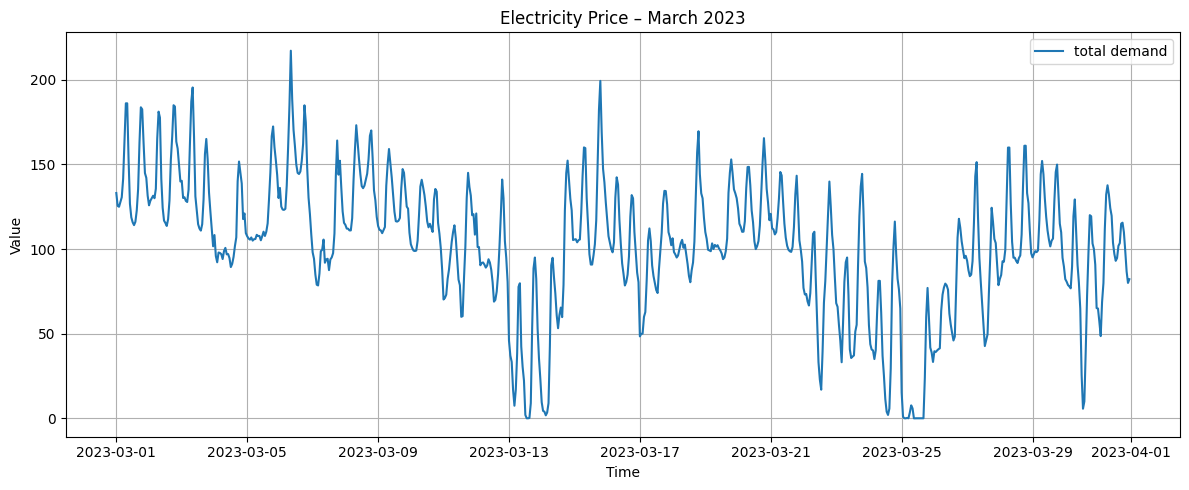

E_price    0.06
dtype: float64

In [12]:

Tou_price = pd.read_csv("electricity_price_march_2023.csv", header=None, names=["E_price"])
tou_Price = Tou_price[::8].copy()

tou_Price.loc[len(tou_Price)] = 82.19
tou_price = tou_Price.reset_index(drop=True)

tou_price.index = net.snapshots
tou_price.loc[tou_price["E_price"] <= 0, "E_price"] = 0.1

plt.figure(figsize=(12, 5))
plt.plot(tou_price,  label="total demand")
plt.title("Electricity Price – March 2023")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
#tou_price.max()
tou_price.min()

# total demand and Solar Generation visualization – March 2023 
#### to ensure reasonable PV sizing

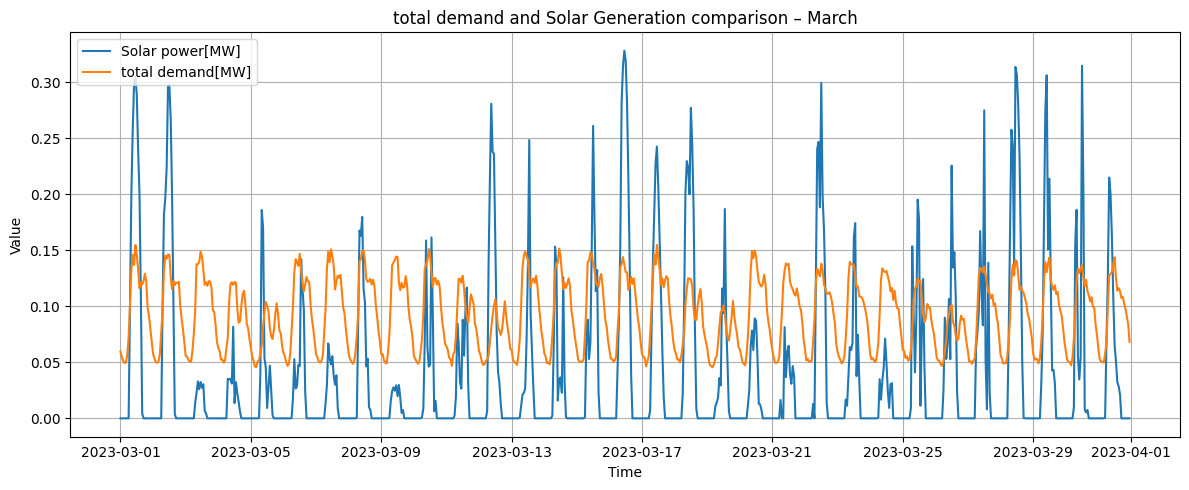

In [13]:
plt.figure(figsize=(12, 5))
plt.plot( solar_gen["power[W]"], label="Solar power[MW]")
plt.plot(tot_demand["Demand [MWh]"],  label="total demand[MW]")

plt.title("total demand and Solar Generation comparison – March")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
df_diff = tot_demand["Demand [MWh]"]-  solar_gen["power[W]"]
display(df_diff.max())
display(df_diff.min())

0.12912038153346622

-0.2004251148794797

# All simulated generators
###### 3 generators are used in this model; solar with 400 kwp capacity, Biomass generator as base-load generator with rated power of 60 kw, and grid generator
###### source for Biomass generator: https://www.drax.com/opinion/the-role-of-biomass-in-securing-reliable-power-generation/#:~:text=globally

In [15]:


net.add("Generator", "grid_generator",
        bus="grid", p_nom=1e6,
        marginal_cost=tou_price["E_price"],
        capital_cost=0)

net.add("Generator", "solar",
        bus="solar_bus",
        p_nom=1,
        p_max_pu= solar_gen["power[W]"],
        marginal_cost= 104.5)   

net.add("Generator", "Biomass",    
         bus="Biomass", p_nom=0.06,   # find a source how much percent should be based load covering
         marginal_cost= 104.8)  


Index(['Biomass'], dtype='object')

# Loads (g0,g1,H0...)
###### location of the loads in their buses

In [16]:
net.add("Load","demand_Gewerbe",
        bus="demand_Gewerbe",
        p_set=tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"])

net.add("Load","demand_houshold",
        bus="houshold",
        p_set=tot_Houshold["tot_demand_Houshold_variants_[MWh]"])

net.add("Load","demand_houshold_pv_storage",
        bus="houshold_pv_storage",
        p_set=tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"])

net.add("Load","demand_Landswirtschaftsbetriebe",
        bus="Landswirtschaftsbetriebe",
        p_set=tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"])

net.add("Load","demand_flex_load",
        bus="flex_load",
        p_set=tot_flex_load["tot_demand_flex_load_variants_[MWh]"])

Index(['demand_flex_load'], dtype='object')

# Battery Energy Storage System(BESS)

###### A BESS is simulated as a buffer for solar generation to store the excess solar generation and restore in shortfall of solar generation.
###### based on this paper: https://arxiv.org/pdf/2011.06963 , the minimal capacity of BESS should be the half of peak installed PV.
###### the deep of discharge (DoD) range and the capacity degradation are neglegted here to reduce the capital cost of installation, because there are other flexibility provider in this model to act as buffer(V2G and shiftable load)
##### the Battery specification used in this simulation is: https://glceenergy.com/products/200kwh-system-industrial-and-commercial-energy-storage-systems?variant=44854857040147&_gsid=HEUWY26Mov6a&utm

In [17]:

net.add("Store", "battery_storage",
        bus="battery_bus",
        e_nom=0.20,        # half of peak installed PV = 400 kwp      
        e_initial=0,    
        e_cyclic=True)

Index(['battery_storage'], dtype='object')

# Battery for laod shifting(Demand Side Management)
##### Simulation of a small battery storage in the flexible load bus to store the energy in the hours with lower electricity cost and dispatch in the high electricity price, source : https://www.mdpi.com/2071-1050/15/21/15555
##### Assumption: the load unit in the flex_load bus has a cold storage warehouse(shiftable load) that can be turn off and turn on daily base on dynamic pricing or different simulation scenarios e.g. in demand response program for its cost minimization or in the hours with grid congestion as flexibility provider.
##### this cold storage warehouse can be turned off  in 4 consecutive hours(with hourly power consumption of 25 KW) and turn on in other 4 consecutive hours based on desired scenario. The designed small battery (100 KW) is used to facilitate this purpose

In [18]:
P = 0.025   # MW  (25 kW)
L = 4       # hours per block
E = P * L   # 0.1 MWh energy budget

net.add(
    "Store", "DSM",
    bus="flex_load",
    e_nom=E,           # total shiftable energy (MWh)
    max_hours=L,       # power cap p_max = E / L = P (MW)
    e_initial=0.0,
    e_cyclic=False,    # enforce daily neutrality
    efficiency_store=1.0,
    efficiency_dispatch=1.0,
    standing_loss=0.0,
    marginal_cost=0.0  
)


Index(['DSM'], dtype='object')

# Links from GRID to LOADS
#####  total amount of Netzentgelt, weitere Abgaben und umlagen is considered here 216 euro per MWh as the link marginal costs to reflect the realistic electricity costs that costumers must pay(market clearing price+Netzentgelt+Steuern+ weitere Abgaben und Umlagen)
##### the average amount of these levies on first of April 2023 was 216 euro per MWh source: https://www.bundesnetzagentur.de/DE/Vportal/Energie/PreiseAbschlaege/start.html)
##### the capacity of the public transmittion line is big enough (10 MW)

In [19]:

net.add("Link", "to_gewerbe",bus0="grid", bus1="demand_Gewerbe",p_nom=10, marginal_cost=216)
net.add("Link", "to_houshold",bus0="grid", bus1="houshold",p_nom=10, marginal_cost=216)
net.add("Link", "to_houshold_pv_storage",bus0="grid", bus1="houshold_pv_storage",p_nom=10,marginal_cost=216)
net.add("Link", "to_Landswirtschaftsbetriebe",bus0="grid", bus1="Landswirtschaftsbetriebe",p_nom=10,marginal_cost=216)
net.add("Link", "to_flex_load",bus0="grid", bus1="flex_load",p_nom=10, marginal_cost=216)

Index(['to_flex_load'], dtype='object')

# Links from SOLAR to LOADS
##### the total Netzentgelt, weitere Abgaben und umlagen inside this simulated market model is considered here 100 euro per MWh from solar to the loads(the half of public transmittion line) as the link marginal costs.
#####  links capacities are 400 kw, because the rated power of the solar is 400 kw, in order to carry the probable rated solar power.

In [20]:

net.add("Link", "solar_to_gewerbe", bus0="solar_bus", bus1="demand_Gewerbe", p_nom=0.4, marginal_cost=100)
net.add("Link", "solar_to_houshold", bus0="solar_bus", bus1="houshold", p_nom=0.4, marginal_cost=100)
net.add("Link", "solar_to_pvhouse", bus0="solar_bus", bus1="houshold_pv_storage", p_nom=0.4,marginal_cost=100)
net.add("Link", "solar_to_landwirtschaft", bus0="solar_bus", bus1="Landswirtschaftsbetriebe", p_nom=0.4,marginal_cost=100)
net.add("Link", "solar_to_flex_load", bus0="solar_bus", bus1="flex_load", p_nom=0.4,marginal_cost=100)

Index(['solar_to_flex_load'], dtype='object')

# Links from BIOMASS to the LOADS
##### the total Netzentgelt, weitere Abgaben und umlagen inside the simulated market model is considered here 100 euro per MWh from biomass generator to the loads(the half of public transmittion line) as the link marginal costs
##### links capacities are 60 kw, because the rated power of the Biomas generator is 60 kw, in order to carry the propable rated biomass power.

In [21]:
net.add("Link", "Biomass_to_gewerbe", bus0="Biomass", bus1="demand_Gewerbe", p_nom=0.06,marginal_cost=100)
net.add("Link", "Biomass_to_houshold", bus0="Biomass", bus1="houshold", p_nom=0.06,marginal_cost=100)
net.add("Link", "Biomass_to_pvhouse", bus0="Biomass", bus1="houshold_pv_storage", p_nom=0.06,marginal_cost=100)
net.add("Link", "Biomass_to_landwirtschaft", bus0="Biomass", bus1="Landswirtschaftsbetriebe", p_nom=0.06,marginal_cost=100)
net.add("Link", "Biomass_to_flex_load", bus0="Biomass", bus1="flex_load", p_nom=0.06,marginal_cost=100)

Index(['Biomass_to_flex_load'], dtype='object')

# Links from Solar to BESS, BESS to the LOADS

##### rated charging and discharging power of the BESS is 100 KW based on its specification: https://glceenergy.com/products/200kwh-system-industrial-and-commercial-energy-storage-systems?variant=44854857040147&_gsid=HEUWY26Mov6a&utm

In [22]:
net.add("Link", "battery_charge",bus0="solar_bus", bus1="battery_bus", p_nom=0.1, efficiency=1, marginal_cost=0.01, committable=False)

net.add("Link", "BESS_to_gewerbe", bus0="battery_bus", bus1="demand_Gewerbe", p_nom=0.1, marginal_cost=100.03 , committable=False)
net.add("Link", "BESS_to_houshold", bus0="battery_bus", bus1="houshold", p_nom=0.1 , marginal_cost=100.03 , committable=False)
net.add("Link", "BESS_to_pvhouse", bus0="battery_bus", bus1="houshold_pv_storage", p_nom=0.1 , marginal_cost=100.03 , committable=False)
net.add("Link", "BESS_to_landwirtschaft", bus0="battery_bus", bus1="Landswirtschaftsbetriebe", p_nom=0.1 , marginal_cost=100.03, committable=False)
net.add("Link", "BESS_to_flex_load", bus0="battery_bus", bus1="flex_load", p_nom=0.1 , marginal_cost=100.03 , committable=False)

Index(['BESS_to_flex_load'], dtype='object')

# EVs buses
##### 20 EVs are simulated with these specifications(4 of each) with charging and discharging capacity of 11 KW, source:(https://www.evspecifications.com/): 
###### tesla model 3 RWD 2022 : Battery capacity = 62 kwh         14.4 kwh / 100 km
###### vw id3 pro :  Battery capacity = 58 kWh         15.6 kwh / 100 km
###### vw id7 :  Battery capacity = 77 kW·h       14.1 kwh / 100 km
###### BMW i4 M50 :   Bttery capacity =  83.9 kwh   22.5 kwh/ 100 km
###### Benz EQE 300 :   Bttery capacity = 89 kwh   16.4 kwh/ 100 km
##### average daily driving of German car owners users(classification B) based on the paper"https://www.researchgate.net/publication/334124582_Environmental_Sustainability_in_the_Context_of_Mass_Personalisation_-_Quantification_of_the_Carbon_Footprint_with_Life_Cycle_Assessment" are between 31.5 and 49.3 km per day. We assign a random value between these values for each EVs
#### in the baseline scenario:
##### based on the battery efficiencies of the EVs defined above, the total daily and monthly needed energy for each EVs can be calculated, therefore total charging hours in the whole month with charging capacity of 11 KW can be obtained as well. For example EV1 must be charged in 21 hours totaly in the simulation period. these 21 charging hours are distributed in the month randomly at the predefined charging hours, between [9,12] and [19,23], roughly with the same charging weight in each 4 weeks. It means there are no availibility for charging at the other hours of the month except these 21 charging hours. These charging hours are infact like a block of load component or precisley charging hours at the charging station that must be met, but in the smart charging scenario:
#### in the enhanced smart charging scenario:
##### in this scenario the total amount of needed charging power is equal to the baseline scenario and splitted in 2 block hours per day between [6,10] and [16,19]. These are infact daily driving consumptions of all EVs. The availibilities of EVs for charging are in total 8 hours per days; 5 hours between 2 daily driving consumption blocks explained above and 3 hours after last daily driving consumption. actualy in this scenario for driving and availibility charging patterns is assumed that there are 20 EV owner, who have daily departure to work place and go back to home and between these they are 5 hours available for charging and 3 hours after arriving home. The optimizer can choose and optimize the daily charging hours based on the available excess solar production and minimize total charging costs for EV owners. In these availibility hours the EVs can inject power to the grid with the fixed tarif of -70 euro per MW base on this paper: https://www.sciencedirect.com/science/article/pii/S0306261924019299 to compensate economically the degradation rate of the BEV. The V2G hours optimizes by optimizer of the PyPSA aimed to 2 purposes, first as facilitators of grid stability and flexibility, and second as economical outcome for EV owners. The initial state of charge of all EVs are 20 percent of the battery capacity.


In [23]:
charging_profiles = pd.read_csv("charging_profiles.csv", index_col=0, parse_dates=True)
driving_profiles = pd.read_csv("driving_profiles_2.csv", index_col=0, parse_dates=True)
availability_profiles = pd.read_csv("availability_profiles_3.csv", index_col=0, parse_dates=True)
battery_df = pd.read_csv("battery_df.csv", index_col=0)

assert (charging_profiles.index == driving_profiles.index).all()
assert (charging_profiles.index == availability_profiles.index).all()
assert set(charging_profiles.columns) <= set(battery_df.index)


net.set_snapshots(charging_profiles.index)

#net.links_t.p_max_pu = pd.DataFrame(index=charging_profiles.index)
net.links_t.p_max_pu = pd.DataFrame(1.0, index=charging_profiles.index, columns=[])

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
    
    ev_bus = f"{ev_id}_bus"
    link_name = f"{ev_id}_charge"
    Link_name = f"{ev_id}_Charge"
    LInk_name = f"{ev_id}_CHarge"
    load_name = f"{ev_id}_load"
    store_name = f"{ev_id}_store"

    V2G_name = f"{ev_id}_discharge"

    availability = availability_profiles[ev_name]

    

    net.add("Bus", ev_bus)

    net.add("Store", store_name,
            bus=ev_bus,
            e_nom = battery_df.loc[ev_name, "e_nom_MWh"],
            e_initial = battery_df.loc[ev_name, "e_initial_MWh"],
            e_cyclic=False,
            marginal_cost=0)

    net.add("Link", link_name,
            bus0="grid",   
            bus1=ev_bus,   
            p_nom=0.011,      
            marginal_cost=216,
            committable=False)
    
    net.add("Link", Link_name,
            bus0="solar_bus",   
            bus1=ev_bus,   
            p_nom=0.011,      
            marginal_cost=100,
            committable=False)

    net.add("Link", LInk_name,
            bus0="battery_bus",   
            bus1=ev_bus,   
            p_nom=0.011,      
            marginal_cost=100,
            committable=False)

    net.add("Load", load_name,
            bus=ev_bus,
            p_set=driving_profiles[ev_name])

    net.add("Link", V2G_name,
            bus0=ev_bus,   
            bus1="solar_bus",   
            p_nom=0.011,      
            marginal_cost= -70,
            committable=False)
    
    net.links_t.p_max_pu[Link_name] = availability
    net.links_t.p_max_pu[link_name] = availability
    net.links_t.p_max_pu[LInk_name] = availability
    net.links_t.p_max_pu[V2G_name] = availability

In [24]:

'''ev_power = 13 / 1000
initial_energy = 25 / 1000
roundtrip_eff = 0.95



for i in range(20):
    ev_name = f"EV{i+1}"                                                                                                           
    ev_bus = f"ev{i+1}_bus"
    
    profile_index = (i % 5) + 1
    consumption_col = f"power_consumption{profile_index}_kW"
    availability_col = f"availability{profile_index}"
    Battery_capacity_col = f"Battery_capacity{profile_index}_kwh"

    consumption_series = df_EVs[consumption_col]
    availability_series = df_EVs[availability_col]
    Battery_capacity_series = df_EVs[Battery_capacity_col]

    net.add("Bus", ev_bus)
    battery_capacity = Battery_capacity_series.iloc[0] / 1000
    net.add("Store", f"{ev_name}_store",
            bus=ev_bus,
            e_nom= battery_capacity,
            e_initial=initial_energy,
            marginal_cost=0,
            e_cyclic=False)

    net.add("Link", f"{ev_name}_charge",
            bus0="grid", bus1=ev_bus,
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=0,
            committable=True)
    
    net.add("Link", f"{ev_name}_Charge",
            bus0="solar_bus", bus1=ev_bus,
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=0,
            committable=True)

    net.add("Link", f"{ev_name}_CHarge",
            bus0="Biomass", bus1=ev_bus,
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=0,
            committable=True)
    
    net.add("Link", f"{ev_name}_discharge",
            bus0=ev_bus, bus1="grid",
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=-0.12*tou_price["E_price"],  #-132 should be based on a Paper
            committable=True)

    net.add("Load", f"{ev_name}_load",
            bus=ev_bus,
            p_set=consumption_series/1000)'''


'ev_power = 13 / 1000\ninitial_energy = 25 / 1000\nroundtrip_eff = 0.95\n\n\n\nfor i in range(20):\n    ev_name = f"EV{i+1}"                                                                                                           \n    ev_bus = f"ev{i+1}_bus"\n    \n    profile_index = (i % 5) + 1\n    consumption_col = f"power_consumption{profile_index}_kW"\n    availability_col = f"availability{profile_index}"\n    Battery_capacity_col = f"Battery_capacity{profile_index}_kwh"\n\n    consumption_series = df_EVs[consumption_col]\n    availability_series = df_EVs[availability_col]\n    Battery_capacity_series = df_EVs[Battery_capacity_col]\n\n    net.add("Bus", ev_bus)\n    battery_capacity = Battery_capacity_series.iloc[0] / 1000\n    net.add("Store", f"{ev_name}_store",\n            bus=ev_bus,\n            e_nom= battery_capacity,\n            e_initial=initial_energy,\n            marginal_cost=0,\n            e_cyclic=False)\n\n    net.add("Link", f"{ev_name}_charge",\n           

# Plotting the Network

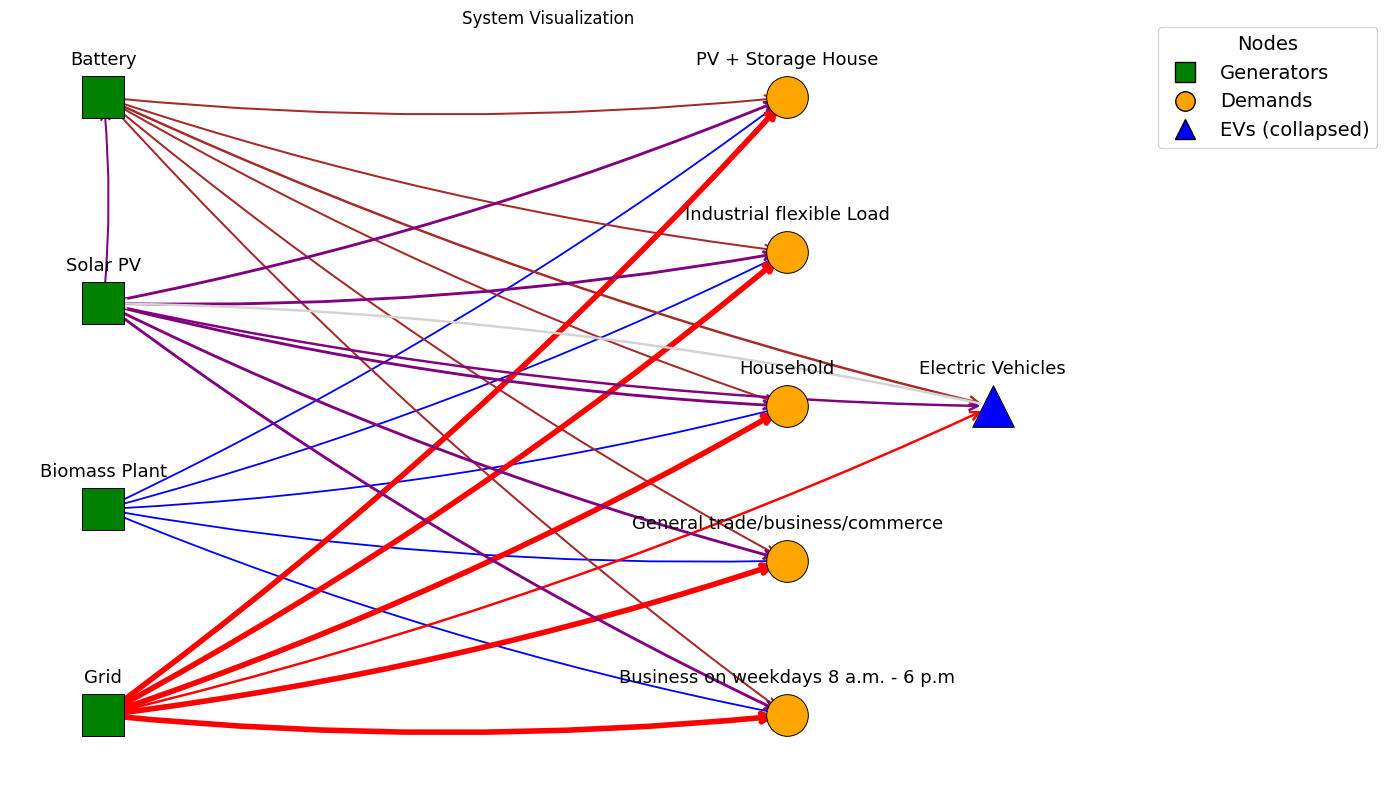

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def plot_buses_links_collapsed(
    net,
    generator_buses=None,
    load_buses=None,
    ev_suffix="_bus",
    ev_supernode="EVs",
    show_edge_labels=False
):


    buses = list(net.buses.index)

    if generator_buses is None:
        generator_buses = {"grid", "solar_bus", "Biomass", "battery_bus"}
    if load_buses is None:
        load_buses = {
            "demand_Gewerbe", "houshold", "houshold_pv_storage",
            "Landswirtschaftsbetriebe", "flex_load"
        }

    def is_ev_bus(b):
        return b.endswith(ev_suffix) and (b not in generator_buses) and (b not in load_buses)

    ev_buses = {b for b in buses if is_ev_bus(b)}
    gens_all  = sorted([b for b in buses if b in generator_buses])
    loads     = sorted([b for b in buses if b in load_buses])
    others    = sorted([b for b in buses if (b not in generator_buses) and (b not in load_buses) and (b not in ev_buses)])

    # ---- Build graph, collapse EVs, aggregate parallel links
    G = nx.DiGraph()
    for b in gens_all:  G.add_node(b, kind="generator")
    for b in loads:     G.add_node(b, kind="load")
    for b in others:    G.add_node(b, kind="other")
    if ev_buses:        G.add_node(ev_supernode, kind="ev")

    agg = defaultdict(lambda: {"p_nom": 0.0, "labels": []})
    for name, row in net.links.iterrows():
        u = row["bus0"]; v = row["bus1"]
        if u in ev_buses: u = ev_supernode
        if v in ev_buses: v = ev_supernode
        if u not in G.nodes or v not in G.nodes:
            continue
        key = (u, v, u)
        agg[key]["p_nom"] += float(row.get("p_nom", 0) or 0)
        agg[key]["labels"].append(str(name))
    for (u, v, source), data in agg.items():
        G.add_edge(u, v, p_nom=data["p_nom"], source=source, label=" | ".join(data["labels"]))

    # ---- Positions
    pos = {}
    desired_order = ["grid", "Biomass", "solar_bus", "battery_bus"]
    gen_order = [g for g in desired_order if g in gens_all] + [g for g in gens_all if g not in desired_order]
    y_gen = np.linspace(0, 1, max(len(gen_order), 1))
    for i, b in enumerate(gen_order):
        pos[b] = (0.0, float(y_gen[i]))

    y_o = np.linspace(0, 1, max(len(others), 1))
    for i, b in enumerate(others):
        pos[b] = (0.5, float(y_o[i]))

    y_l = np.linspace(0, 1, max(len(loads), 1))
    for i, b in enumerate(loads):
        pos[b] = (1.0, float(y_l[i]))
        pos["houshold"]  = (1.0, 0.5)   # higher
        pos["flex_load"] = (1.0, 0.75)   # just below

    if ev_buses:
        pos[ev_supernode] = (1.3, 0.5)

    # ---- Draw
    plt.figure(figsize=(14, 8))

    groups = {
        "generator": {"nodes":[n for n,d in G.nodes(data=True) if d["kind"]=="generator"],
                      "color":"green",   "size":900, "shape":"s", "label":"Generators"},
        "other":     {"nodes":[n for n,d in G.nodes(data=True) if d["kind"]=="other"],
                      "color":"gray",    "size":700, "shape":"o", "label":"Other"},
        "load":      {"nodes":[n for n,d in G.nodes(data=True) if d["kind"]=="load"],
                      "color":"orange",  "size":900, "shape":"o", "label":"Demands"},
        "ev":        {"nodes":[n for n,d in G.nodes(data=True) if d["kind"]=="ev"],
                      "color":"blue",    "size":900, "shape":"^", "label":"EVs (collapsed)"},
    }

    handles_nodes, labels_nodes = [], []
    for _, cfg in groups.items():
        nodes = cfg["nodes"]
        if not nodes: 
            continue
        nx.draw_networkx_nodes(
            G, pos, nodelist=nodes,
            node_color=cfg["color"], node_size=cfg["size"],
            node_shape=cfg["shape"], edgecolors="black", linewidths=0.7
        )
        h = plt.Line2D([0],[0], marker=cfg["shape"], linestyle="", color=cfg["color"],
                       markeredgecolor="black", markersize=14)
        handles_nodes.append(h); labels_nodes.append(cfg["label"])

    # Edge colors
    strong_colors = ["red", "blue", "purple", "brown", "magenta", "cyan", "black", "gold", "darkorange"]
    gen_sources = [g for g in gen_order if g in G and G.out_degree(g) > 0]
    gen_edge_colors = {s: strong_colors[i % len(strong_colors)] for i, s in enumerate(gen_sources)}
    non_gen_edge_color = "lightgray"

    for u, v, d in G.edges(data=True):
        if d["source"] in gen_edge_colors:
            ecolor = gen_edge_colors[d["source"]]
        else:
            ecolor = non_gen_edge_color
        width = 1.0 + 1.5*np.log10(1 + d.get("p_nom", 0)*10)
        nx.draw_networkx_edges(
            G, pos, edgelist=[(u, v)],
            edge_color=ecolor, width=width,
            arrows=True, arrowstyle="->", arrowsize=15,
            connectionstyle="arc3,rad=0.05"
        )

    # Labels above nodes
    offset = 0.06
    pos_labels = {n: (x, y + offset) for n, (x, y) in pos.items()}
    # Custom labels mapping
    custom_labels = {
    "grid": "Grid",
    "solar_bus": "Solar PV",
    "battery_bus": "Battery",
    "Biomass": "Biomass Plant",
    "houshold": "Household",
    "houshold_pv_storage": "PV + Storage House",
    "demand_Gewerbe": "General trade/business/commerce",
    "Landswirtschaftsbetriebe": "Business on weekdays 8 a.m. - 6 p.m",
    "flex_load": "Industrial flexible Load",
    "EVs": "Electric Vehicles"
    }

    nx.draw_networkx_labels(
    G, pos_labels, labels=custom_labels,
    font_size=13, font_weight="normal"
    )


    if show_edge_labels:
        edge_labels = {(u, v): d.get("label","") for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

    ax = plt.gca()
    ax.legend(handles_nodes, labels_nodes, title="Nodes",
              loc="upper right", bbox_to_anchor=(1.28, 1.02),
              frameon=True, fontsize=14, title_fontsize=14)

    plt.title("System Visualization")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_buses_links_collapsed(net)    

# add costum constraints and solving the model 1:
### first solving the model with these constraints and assign the solution. this model is already a MILP due to the 4. constraint. all the constraints are listed below:
##### 1) Battery state of charge of all EVs must be kept between 20% and 80 percent of the capacity
##### 2) the total V2G could not be exceeded 30 percent of the total charging in the simulation period, to prevent the optimizer from trading with grid and implement a realistic situation
##### 3) Battery state of charge of central storage(BESS) must be kept between 20% and 80% of its capacity
##### 4) the battery in flexible load can charge daily in 4 consecutive hours and dispatch it at another 4 consecutive hours in the same day and its SoC at 00:00 must be same with 23:00 every day to shift just the load consumption of the cold storage warehouse of the flexible load unit(4*25 KW)
##### 5) The total EVs charging amount must be equal or lower than 11 KW per hours, because EVs can be charged simultanously from different generators and they are linked to the all generators and all link capacities are 11KW.
##### 6) Add a costum constraint to prevent simultanously charging and discharging to the grid, because a EV can be either charged or discharged
##### 7) max amount of BESS discharging to the loads must be lower or equal to its discharging rated capacity(100 KW), because all the link capacities from BESS to the loads are 100KW and BESS can be discharged with its rated discharging capacity to more than  1 load units.

In [26]:
import xarray as xr
model = net.optimize.create_model()

store_dim = model.variables["Store-e"].dims[1]
link_dim = model.variables["Link-p"].dims[1]

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
    store_id = f"{ev_id}_store"

    battery_capacity = battery_df.loc[ev_name, "e_nom_MWh"]
    soc_min = 0.2 * battery_capacity
    soc_max = 0.8 * battery_capacity

    soc = model.variables["Store-e"].sel({store_dim: store_id})
    model.add_constraints(soc >= soc_min, name=f"{ev_id}_soc_min")
    model.add_constraints(soc <= soc_max, name=f"{ev_id}_soc_max")

#########################################################################
p_nom = 0.011
P_nom = 0.1

eps = 1e-6  # tiny weight to discourage simultaneous charge & discharge
penalty_expr = 0  # start scalar, will become a LinearExpression through addition

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")

    link_grid = f"{ev_id}_charge"
    link_solar = f"{ev_id}_Charge"
    link_battery = f"{ev_id}_CHarge"
    link_v2g   = f"{ev_id}_discharge"

    p_grid = model.variables["Link-p"].sel({link_dim: link_grid})
    p_solar = model.variables["Link-p"].sel({link_dim: link_solar})
    p_batt = model.variables["Link-p"].sel({link_dim: link_battery})
    p_v2g   = model.variables["Link-p"].sel({link_dim: link_v2g})

    p_plus = model.add_variables(
        name=f"{ev_id}_p_plus",
        lower=0,
        coords=p_grid.coords,
        dims=p_grid.dims,
    )

    p_minus = model.add_variables(
        name=f"{ev_id}_p_minus",
        lower=0,
        coords=p_grid.coords,
        dims=p_grid.dims,
    )

    model.add_constraints(p_minus == p_v2g,            name=f"{ev_id}_minus_def")
    model.add_constraints(p_plus  == p_grid + p_solar + p_batt , name=f"{ev_id}_plus_def")

    model.add_constraints(p_plus  <= p_nom, name=f"{ev_id}_plus_cap")
    model.add_constraints(p_minus <= p_nom, name=f"{ev_id}_minus_cap")

    model.add_constraints(
        p_minus.sum() <= 0.3 * p_plus.sum(),
        name=f"{ev_id}_discharge_le_30pct_of_charge",
    )

    # accumulate scalar penalty
    penalty_expr = penalty_expr + p_plus.sum() + p_minus.sum()
      

    link_dim = model.variables["Link-p"].dims[1]
    link_BESS_to_gewerbe = "BESS_to_gewerbe"
    link_BESS_to_houshold = "BESS_to_houshold" 
    link_BESS_to_pvhouse = "BESS_to_pvhouse"
    link_BESS_to_landwirtschaft = "BESS_to_landwirtschaft"
    link_BESS_to_flex_load = "BESS_to_flex_load"

    p_BESStoGewerbe = model.variables["Link-p"].sel({link_dim: link_BESS_to_gewerbe})
    p_BESStoHaushold = model.variables["Link-p"].sel({link_dim: link_BESS_to_houshold })
    p_BESStoPvhouse = model.variables["Link-p"].sel({link_dim: link_BESS_to_pvhouse})
    p_BESStoLandwirtschaft = model.variables["Link-p"].sel({link_dim: link_BESS_to_landwirtschaft})
    p_BESStoFlexload = model.variables["Link-p"].sel({link_dim: link_BESS_to_flex_load})


    model.add_constraints(
        p_BESStoGewerbe + p_BESStoHaushold + p_BESStoPvhouse
        + p_BESStoLandwirtschaft + p_BESStoFlexload + p_batt <= P_nom,
        name=f"{ev_id}_bess_dispatch_cap"
    )
    
############################################################################
store_dim = model.variables["Store-e"].dims[1]

Battery_capacity = net.stores.at["battery_storage", "e_nom"]

soc_batt = model.variables["Store-e"].sel({store_dim: "battery_storage"})

SoC_min = 0.2 * Battery_capacity
SoC_max = 0.8 * Battery_capacity

model.add_constraints(soc_batt >= SoC_min, name="battery_storage_soc_min")
model.add_constraints(soc_batt <= SoC_max, name="battery_storage_soc_max")
############################################################################

snap_dim = model.variables["Store-p"].dims[0]   # usually "snapshot"
store_dim = model.variables["Store-p"].dims[1]  # usually "store"

p = model.variables["Store-p"].sel({store_dim: "DSM"})  # MW (+ discharge reduces net demand)
e = model.variables["Store-e"].sel({store_dim: "DSM"})  # MWh

T = list(net.snapshots)

# Use a dict or a (name, values) tuple so the dim name is preserved
# after snap_dim is defined, e.g. snap_dim = model.variables["Store-p"].dims[0]
y_pos = model.add_variables(binary=True, coords=[(snap_dim, net.snapshots)], name="dsm_pos_start")
y_neg = model.add_variables(binary=True, coords=[(snap_dim, net.snapshots)], name="dsm_neg_start")



# Helper: group snapshots by day
days = pd.to_datetime(net.snapshots).normalize().unique()
by_day = {d: [t for t in T if t.normalize() == d] for d in days}

# Forbid starts in the last L-1 hours of each day (to keep 4h blocks within the day)
for d, hours in by_day.items():
    forbid = hours[-(L-1):]  # e.g., 21,22,23 for L=4
    for t in forbid:
        model.add_constraints(y_pos.sel({snap_dim: t}) == 0, name=f"pos_forbid_{t}")
        model.add_constraints(y_neg.sel({snap_dim: t}) == 0, name=f"neg_forbid_{t}")

# Active-block logic via running sum of starts over the last L hours
for i, t in enumerate(T):
    # running window (won't cross midnight because of the "forbid" above)
    k0 = max(0, i - (L - 1))
    ks = T[k0:i+1]
    active_pos = y_pos.sel({snap_dim: ks}).sum(snap_dim)
    active_neg = y_neg.sel({snap_dim: ks}).sum(snap_dim)

    # No simultaneous + and - in the same hour
    model.add_constraints(active_pos + active_neg <= 1, name=f"no_overlap_{t}")

    # Exact power when active: +P for pos block, -P for neg block; 0 otherwise
    model.add_constraints(p.sel({snap_dim: t}) == P*active_pos - P*active_neg,
                      name=f"exact_power_{t}")

# Prevent overlapping starts of the same type within any 4h window
for i, t in enumerate(T):
    k0 = max(0, i - (L - 1))
    ks = T[k0:i+1]
    model.add_constraints(y_pos.sel({snap_dim: ks}).sum(snap_dim) <= 1, name=f"pos_nonoverlap_{t}")
    model.add_constraints(y_neg.sel({snap_dim: ks}).sum(snap_dim) <= 1, name=f"neg_nonoverlap_{t}")

# Exactly one + block and one - block per day (daily cardinality)
for d, hours in by_day.items():
    # valid start hours for that day (exclude last L-1 already forced to 0)
    valid_starts = hours[:- (L-1)] if L > 1 else hours
    if len(valid_starts) > 0:
        model.add_constraints(y_pos.sel({snap_dim: valid_starts}).sum(snap_dim) == 1,
                          name=f"pos_one_block_{d.date()}")
        model.add_constraints(y_neg.sel({snap_dim: valid_starts}).sum(snap_dim) == 1,
                          name=f"neg_one_block_{d.date()}")

# Daily neutrality: SoC at 00:00 equals SoC at 23:00 (per day)
for d, hours in by_day.items():
    start = hours[0]           # 00:00
    end   = hours[-1]          # 23:00
    model.add_constraints(e.sel({snap_dim: start}) == e.sel({snap_dim: end}),
                      name=f"daily_neutral_{d.date()}")


############################################################################
base_expr = model.objective.expression  # LinearExpression
model.add_objective(base_expr + eps * penalty_expr, overwrite=True)

net.optimize.solve_model(
    solver_name="gurobi",
    solver_options={
    "TimeLimit": 600,     # in seconds = 10 minutes
        #"MIPGap": 0.005        # stop when within 1% of best known solution
    }
)
net.optimize.assign_solution()

dsm_fixed = net.stores_t.p["DSM"].copy()

Index(['grid', 'solar_bus', 'demand_Gewerbe', 'houshold',
       'houshold_pv_storage', 'Landswirtschaftsbetriebe', 'battery_bus',
       'flex_load', 'Biomass', 'tesla_model_3_1_bus', 'tesla_model_3_2_bus',
       'tesla_model_3_3_bus', 'tesla_model_3_4_bus', 'vw_id3_pro_1_bus',
       'vw_id3_pro_2_bus', 'vw_id3_pro_3_bus', 'vw_id3_pro_4_bus',
       'vw_id7_1_bus', 'vw_id7_2_bus', 'vw_id7_3_bus', 'vw_id7_4_bus',
       'bmw_i4_m50_1_bus', 'bmw_i4_m50_2_bus', 'bmw_i4_m50_3_bus',
       'bmw_i4_m50_4_bus', 'benz_eqe_300_1_bus', 'benz_eqe_300_2_bus',
       'benz_eqe_300_3_bus', 'benz_eqe_300_4_bus'],
      dtype='object', name='Bus')
Index(['battery_storage', 'DSM', 'tesla_model_3_1_store',
       'tesla_model_3_2_store', 'tesla_model_3_3_store',
       'tesla_model_3_4_store', 'vw_id3_pro_1_store', 'vw_id3_pro_2_store',
       'vw_id3_pro_3_store', 'vw_id3_pro_4_store', 'vw_id7_1_store',
       'vw_id7_2_store', 'vw_id7_3_store', 'vw_id7_4_store',
       'bmw_i4_m50_1_store', 'bmw_i4

Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2676468


INFO:gurobipy:Set parameter LicenseID to value 2676468


Academic license - for non-commercial use only - expires 2026-06-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-06-09


Read LP format model from file C:\Users\modi\AppData\Local\Temp\linopy-problem-3t0gr1cx.lp


INFO:gurobipy:Read LP format model from file C:\Users\modi\AppData\Local\Temp\linopy-problem-3t0gr1cx.lp


Reading time = 0.68 seconds


INFO:gurobipy:Reading time = 0.68 seconds


obj: 334355 rows, 141360 columns, 694901 nonzeros


INFO:gurobipy:obj: 334355 rows, 141360 columns, 694901 nonzeros


Set parameter TimeLimit to value 600


INFO:gurobipy:Set parameter TimeLimit to value 600


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 5625U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 5625U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Non-default parameters:


INFO:gurobipy:Non-default parameters:


TimeLimit  600


INFO:gurobipy:TimeLimit  600


INFO:gurobipy:


Optimize a model with 334355 rows, 141360 columns and 694901 nonzeros


INFO:gurobipy:Optimize a model with 334355 rows, 141360 columns and 694901 nonzeros


Model fingerprint: 0xa9c3c5e1


INFO:gurobipy:Model fingerprint: 0xa9c3c5e1


Variable types: 139872 continuous, 1488 integer (1488 binary)


INFO:gurobipy:Variable types: 139872 continuous, 1488 integer (1488 binary)


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [3e-02, 1e+00]


INFO:gurobipy:  Matrix range     [3e-02, 1e+00]


  Objective range  [1e-06, 2e+02]


INFO:gurobipy:  Objective range  [1e-06, 2e+02]


  Bounds range     [1e+00, 1e+00]


INFO:gurobipy:  Bounds range     [1e+00, 1e+00]


  RHS range        [1e-04, 1e+06]


INFO:gurobipy:  RHS range        [1e-04, 1e+06]


Presolve removed 296214 rows and 93174 columns


INFO:gurobipy:Presolve removed 296214 rows and 93174 columns


Presolve time: 0.15s


INFO:gurobipy:Presolve time: 0.15s


Presolved: 38141 rows, 48186 columns, 199181 nonzeros


INFO:gurobipy:Presolved: 38141 rows, 48186 columns, 199181 nonzeros


Variable types: 46884 continuous, 1302 integer (1302 binary)


INFO:gurobipy:Variable types: 46884 continuous, 1302 integer (1302 binary)


Performing another presolve...


INFO:gurobipy:Performing another presolve...


Presolve removed 17743 rows and 6452 columns


INFO:gurobipy:Presolve removed 17743 rows and 6452 columns


Presolve time: 0.44s


INFO:gurobipy:Presolve time: 0.44s


Deterministic concurrent LP optimizer: primal and dual simplex


INFO:gurobipy:Deterministic concurrent LP optimizer: primal and dual simplex


Showing primal log only...


INFO:gurobipy:Showing primal log only...


INFO:gurobipy:


Concurrent spin time: 0.06s


INFO:gurobipy:Concurrent spin time: 0.06s


INFO:gurobipy:


Solved with primal simplex


INFO:gurobipy:Solved with primal simplex


INFO:gurobipy:


Root relaxation: objective 1.564132e+04, 22894 iterations, 1.34 seconds (1.15 work units)


INFO:gurobipy:Root relaxation: objective 1.564132e+04, 22894 iterations, 1.34 seconds (1.15 work units)


INFO:gurobipy:


    Nodes    |    Current Node    |     Objective Bounds      |     Work


INFO:gurobipy:    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy: Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy:


     0     0 15641.3226    0   96          - 15641.3226      -     -    2s


INFO:gurobipy:     0     0 15641.3226    0   96          - 15641.3226      -     -    2s


H    0     0                    15679.222477 15641.3226  0.24%     -    2s


INFO:gurobipy:H    0     0                    15679.222477 15641.3226  0.24%     -    2s


H    0     0                    15649.998090 15641.3226  0.06%     -    2s


INFO:gurobipy:H    0     0                    15649.998090 15641.3226  0.06%     -    2s


H    0     0                    15642.452329 15641.3226  0.01%     -    3s


INFO:gurobipy:H    0     0                    15642.452329 15641.3226  0.01%     -    3s


INFO:gurobipy:


Cutting planes:


INFO:gurobipy:Cutting planes:


  Gomory: 2


INFO:gurobipy:  Gomory: 2


  Implied bound: 2


INFO:gurobipy:  Implied bound: 2


  MIR: 7


INFO:gurobipy:  MIR: 7


INFO:gurobipy:


Explored 1 nodes (24605 simplex iterations) in 3.10 seconds (2.39 work units)


INFO:gurobipy:Explored 1 nodes (24605 simplex iterations) in 3.10 seconds (2.39 work units)


Thread count was 12 (of 12 available processors)


INFO:gurobipy:Thread count was 12 (of 12 available processors)


INFO:gurobipy:


Solution count 3: 15642.5 15650 15679.2 


INFO:gurobipy:Solution count 3: 15642.5 15650 15679.2 


INFO:gurobipy:


Optimal solution found (tolerance 1.00e-04)


INFO:gurobipy:Optimal solution found (tolerance 1.00e-04)


Best objective 1.564245232912e+04, best bound 1.564142895172e+04, gap 0.0065%


INFO:gurobipy:Best objective 1.564245232912e+04, best bound 1.564142895172e+04, gap 0.0065%
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 141360 primals, 0 duals
Objective: 1.56e+04
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:No shadow prices were assigned to the network.


# building the second model to stay in Linear programing(LP)
#### in PyPSA is not possible to obtain the LMPs in a MILP. The problem must be a LP to get the dual variables and shadow prices of each buses. With the previous model(MILP) we could get the optimized daily time windows for load shifting of the flexible load in the flex_load bus. These daily time windows are infact the hourly charging and discharging amount of the battery in the flex_load bus. The 4 daily charging hours are actually the hours with the cheapest electricity price in order to discharge and meet the demand of cold storage warehous in the expensive hours(turning on this refrige in these expensive hours). These obtained daily time series must be added to the second model below as a constraint to enforce the optimizer to charges and discharges the battery in the flex_load bus. After that the model can be solved and get the LMP of all Buses 

In [27]:
#Stage 2 for obtaining the LMP in LP(turning the model to LP to retrieve the LMPs)

model2 = net.optimize.create_model()

store_dim2 = model2.variables["Store-e"].dims[1]
link_dim2  = model2.variables["Link-p"].dims[1]

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
    store_id = f"{ev_id}_store"

    battery_capacity = battery_df.loc[ev_name, "e_nom_MWh"]
    soc_min = 0.2 * battery_capacity
    soc_max = 0.8 * battery_capacity

    soc = model2.variables["Store-e"].sel({store_dim2: store_id})
    model2.add_constraints(soc >= soc_min, name=f"{ev_id}_soc_min")
    model2.add_constraints(soc <= soc_max, name=f"{ev_id}_soc_max")

##############################################################################################    

p_nom = 0.011
P_nom = 0.1

eps = 1e-6  # tiny weight to discourage simultaneous charge & discharge
penalty_expr = 0  # start scalar, will become a LinearExpression through addition

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")

    link_grid = f"{ev_id}_charge"
    link_solar = f"{ev_id}_Charge"
    link_battery = f"{ev_id}_CHarge"
    link_v2g   = f"{ev_id}_discharge"

    p_grid = model2.variables["Link-p"].sel({link_dim2: link_grid})
    p_solar = model2.variables["Link-p"].sel({link_dim2: link_solar})
    p_batt = model2.variables["Link-p"].sel({link_dim2: link_battery})
    p_v2g   = model2.variables["Link-p"].sel({link_dim2: link_v2g})

    p_plus = model2.add_variables(
        name=f"{ev_id}_p_plus",
        lower=0,
        coords=p_grid.coords,
        dims=p_grid.dims,
    )

    p_minus = model2.add_variables(
        name=f"{ev_id}_p_minus",
        lower=0,
        coords=p_grid.coords,
        dims=p_grid.dims,
    )

    model2.add_constraints(p_minus == p_v2g,            name=f"{ev_id}_minus_def")
    model2.add_constraints(p_plus  == p_grid + p_solar + p_batt , name=f"{ev_id}_plus_def")

    model2.add_constraints(p_plus  <= p_nom, name=f"{ev_id}_plus_cap")
    model2.add_constraints(p_minus <= p_nom, name=f"{ev_id}_minus_cap")

    model2.add_constraints(
        p_minus.sum() <= 0.3 * p_plus.sum(),
        name=f"{ev_id}_discharge_le_30pct_of_charge",
    )

    # accumulate scalar penalty
    penalty_expr = penalty_expr + p_plus.sum() + p_minus.sum()
      

    link_dim2 = model2.variables["Link-p"].dims[1]
    link_BESS_to_gewerbe = "BESS_to_gewerbe"
    link_BESS_to_houshold = "BESS_to_houshold" 
    link_BESS_to_pvhouse = "BESS_to_pvhouse"
    link_BESS_to_landwirtschaft = "BESS_to_landwirtschaft"
    link_BESS_to_flex_load = "BESS_to_flex_load"

    p_BESStoGewerbe = model2.variables["Link-p"].sel({link_dim2: link_BESS_to_gewerbe})
    p_BESStoHaushold = model2.variables["Link-p"].sel({link_dim2: link_BESS_to_houshold })
    p_BESStoPvhouse = model2.variables["Link-p"].sel({link_dim2: link_BESS_to_pvhouse})
    p_BESStoLandwirtschaft = model2.variables["Link-p"].sel({link_dim2: link_BESS_to_landwirtschaft})
    p_BESStoFlexload = model2.variables["Link-p"].sel({link_dim2: link_BESS_to_flex_load})

    model2.add_constraints(
        p_BESStoGewerbe + p_BESStoHaushold + p_BESStoPvhouse
        + p_BESStoLandwirtschaft + p_BESStoFlexload + p_batt <= P_nom,
        name=f"{ev_id}_bess_dispatch_cap"
    )


    
#################################################################################    

store_dim2 = model2.variables["Store-e"].dims[1]
Battery_capacity = net.stores.at["battery_storage", "e_nom"]

soc_batt = model2.variables["Store-e"].sel({store_dim2: "battery_storage"})
SoC_min = 0.2 * Battery_capacity
SoC_max = 0.8 * Battery_capacity

model2.add_constraints(soc_batt >= SoC_min, name="battery_storage_soc_min")
model2.add_constraints(soc_batt <= SoC_max, name="battery_storage_soc_max")

###################################################################################
snap_dim2 = model2.variables["Store-p"].dims[0]
store_dim2p = model2.variables["Store-p"].dims[1]
p2 = model2.variables["Store-p"].sel({store_dim2p: "DSM"})

p_fixed_da = xr.DataArray(dsm_fixed.values, coords=[(snap_dim2, net.snapshots)], name="DSM_fixed_power")
model2.add_constraints(p2 == p_fixed_da, name="fix_dsm_power")

########################################################################################
base_expr = model2.objective.expression  # LinearExpression
model2.add_objective(base_expr + eps * penalty_expr, overwrite=True)

net.optimize.solve_model(solver_name="gurobi")  
net.optimize.assign_solution()



Index(['grid', 'solar_bus', 'demand_Gewerbe', 'houshold',
       'houshold_pv_storage', 'Landswirtschaftsbetriebe', 'battery_bus',
       'flex_load', 'Biomass', 'tesla_model_3_1_bus', 'tesla_model_3_2_bus',
       'tesla_model_3_3_bus', 'tesla_model_3_4_bus', 'vw_id3_pro_1_bus',
       'vw_id3_pro_2_bus', 'vw_id3_pro_3_bus', 'vw_id3_pro_4_bus',
       'vw_id7_1_bus', 'vw_id7_2_bus', 'vw_id7_3_bus', 'vw_id7_4_bus',
       'bmw_i4_m50_1_bus', 'bmw_i4_m50_2_bus', 'bmw_i4_m50_3_bus',
       'bmw_i4_m50_4_bus', 'benz_eqe_300_1_bus', 'benz_eqe_300_2_bus',
       'benz_eqe_300_3_bus', 'benz_eqe_300_4_bus'],
      dtype='object', name='Bus')
Index(['battery_storage', 'DSM', 'tesla_model_3_1_store',
       'tesla_model_3_2_store', 'tesla_model_3_3_store',
       'tesla_model_3_4_store', 'vw_id3_pro_1_store', 'vw_id3_pro_2_store',
       'vw_id3_pro_3_store', 'vw_id3_pro_4_store', 'vw_id7_1_store',
       'vw_id7_2_store', 'vw_id7_3_store', 'vw_id7_4_store',
       'bmw_i4_m50_1_store', 'bmw_i4

Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2676468


INFO:gurobipy:Set parameter LicenseID to value 2676468


Academic license - for non-commercial use only - expires 2026-06-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-06-09


Read LP format model from file C:\Users\modi\AppData\Local\Temp\linopy-problem-ndn72fxw.lp


INFO:gurobipy:Read LP format model from file C:\Users\modi\AppData\Local\Temp\linopy-problem-ndn72fxw.lp


Reading time = 0.68 seconds


INFO:gurobipy:Reading time = 0.68 seconds


obj: 331844 rows, 139872 columns, 675531 nonzeros


INFO:gurobipy:obj: 331844 rows, 139872 columns, 675531 nonzeros


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 5625U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 5625U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 331844 rows, 139872 columns and 675531 nonzeros


INFO:gurobipy:Optimize a model with 331844 rows, 139872 columns and 675531 nonzeros


Model fingerprint: 0xb867350d


INFO:gurobipy:Model fingerprint: 0xb867350d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [3e-01, 1e+00]


INFO:gurobipy:  Matrix range     [3e-01, 1e+00]


  Objective range  [1e-06, 2e+02]


INFO:gurobipy:  Objective range  [1e-06, 2e+02]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [1e-04, 1e+06]


INFO:gurobipy:  RHS range        [1e-04, 1e+06]


Presolve removed 313327 rows and 95537 columns


INFO:gurobipy:Presolve removed 313327 rows and 95537 columns


Presolve time: 0.27s


INFO:gurobipy:Presolve time: 0.27s


Presolved: 18517 rows, 44335 columns, 118624 nonzeros


INFO:gurobipy:Presolved: 18517 rows, 44335 columns, 118624 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.02s


INFO:gurobipy:Ordering time: 0.02s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 1.031e+05


INFO:gurobipy: AA' NZ     : 1.031e+05


 Factor NZ  : 4.895e+05 (roughly 30 MB of memory)


INFO:gurobipy: Factor NZ  : 4.895e+05 (roughly 30 MB of memory)


 Factor Ops : 2.301e+07 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.301e+07 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.52971573e+05 -3.09723719e+05  1.43e+01 4.62e+01  6.84e+01     0s


INFO:gurobipy:   0   7.52971573e+05 -3.09723719e+05  1.43e+01 4.62e+01  6.84e+01     0s


   1   1.64408724e+05 -2.64357577e+05  2.88e+00 3.13e-13  1.44e+01     0s


INFO:gurobipy:   1   1.64408724e+05 -2.64357577e+05  2.88e+00 3.13e-13  1.44e+01     0s


   2   2.80428411e+04 -1.38941414e+05  1.94e-01 2.56e-13  2.31e+00     0s


INFO:gurobipy:   2   2.80428411e+04 -1.38941414e+05  1.94e-01 2.56e-13  2.31e+00     0s


   3   1.80802030e+04 -6.76044104e+03  1.10e-02 2.27e-13  2.80e-01     0s


INFO:gurobipy:   3   1.80802030e+04 -6.76044104e+03  1.10e-02 2.27e-13  2.80e-01     0s


   4   1.66524017e+04  6.19105853e+03  9.93e-04 1.67e-13  1.14e-01     1s


INFO:gurobipy:   4   1.66524017e+04  6.19105853e+03  9.93e-04 1.67e-13  1.14e-01     1s


   5   1.62701677e+04  1.10802225e+04  3.20e-04 1.30e-13  5.63e-02     1s


INFO:gurobipy:   5   1.62701677e+04  1.10802225e+04  3.20e-04 1.30e-13  5.63e-02     1s


   6   1.60697957e+04  1.26145192e+04  1.87e-04 9.59e-14  3.74e-02     1s


INFO:gurobipy:   6   1.60697957e+04  1.26145192e+04  1.87e-04 9.59e-14  3.74e-02     1s


   7   1.60428413e+04  1.31718993e+04  1.71e-04 8.53e-14  3.11e-02     1s


INFO:gurobipy:   7   1.60428413e+04  1.31718993e+04  1.71e-04 8.53e-14  3.11e-02     1s


   8   1.59321638e+04  1.39379425e+04  1.06e-04 8.53e-14  2.16e-02     1s


INFO:gurobipy:   8   1.59321638e+04  1.39379425e+04  1.06e-04 8.53e-14  2.16e-02     1s


   9   1.58857425e+04  1.44218039e+04  8.60e-05 8.53e-14  1.58e-02     1s


INFO:gurobipy:   9   1.58857425e+04  1.44218039e+04  8.60e-05 8.53e-14  1.58e-02     1s


  10   1.58001787e+04  1.49632847e+04  4.90e-05 6.39e-14  9.06e-03     1s


INFO:gurobipy:  10   1.58001787e+04  1.49632847e+04  4.90e-05 6.39e-14  9.06e-03     1s


  11   1.57393601e+04  1.52911891e+04  2.78e-05 5.68e-14  4.85e-03     1s


INFO:gurobipy:  11   1.57393601e+04  1.52911891e+04  2.78e-05 5.68e-14  4.85e-03     1s


  12   1.57155732e+04  1.53973147e+04  2.04e-05 5.68e-14  3.44e-03     1s


INFO:gurobipy:  12   1.57155732e+04  1.53973147e+04  2.04e-05 5.68e-14  3.44e-03     1s


  13   1.57012584e+04  1.54806519e+04  1.62e-05 6.93e-14  2.38e-03     1s


INFO:gurobipy:  13   1.57012584e+04  1.54806519e+04  1.62e-05 6.93e-14  2.38e-03     1s


  14   1.56799417e+04  1.55594146e+04  1.01e-05 5.68e-14  1.30e-03     1s


INFO:gurobipy:  14   1.56799417e+04  1.55594146e+04  1.01e-05 5.68e-14  1.30e-03     1s


  15   1.56729208e+04  1.55882619e+04  8.15e-06 6.02e-14  9.14e-04     1s


INFO:gurobipy:  15   1.56729208e+04  1.55882619e+04  8.15e-06 6.02e-14  9.14e-04     1s


  16   1.56631851e+04  1.56092929e+04  5.44e-06 6.34e-14  5.82e-04     1s


INFO:gurobipy:  16   1.56631851e+04  1.56092929e+04  5.44e-06 6.34e-14  5.82e-04     1s


  17   1.56598988e+04  1.56200034e+04  4.56e-06 8.53e-14  4.30e-04     1s


INFO:gurobipy:  17   1.56598988e+04  1.56200034e+04  4.56e-06 8.53e-14  4.30e-04     1s


  18   1.56517525e+04  1.56308727e+04  2.32e-06 5.68e-14  2.25e-04     1s


INFO:gurobipy:  18   1.56517525e+04  1.56308727e+04  2.32e-06 5.68e-14  2.25e-04     1s


  19   1.56507947e+04  1.56335894e+04  2.07e-06 5.95e-14  1.86e-04     1s


INFO:gurobipy:  19   1.56507947e+04  1.56335894e+04  2.07e-06 5.95e-14  1.86e-04     1s


  20   1.56468752e+04  1.56380514e+04  1.07e-06 5.79e-14  9.51e-05     1s


INFO:gurobipy:  20   1.56468752e+04  1.56380514e+04  1.07e-06 5.79e-14  9.51e-05     1s


  21   1.56442838e+04  1.56403988e+04  4.30e-07 6.43e-14  4.19e-05     1s


INFO:gurobipy:  21   1.56442838e+04  1.56403988e+04  4.30e-07 6.43e-14  4.19e-05     1s


  22   1.56434348e+04  1.56413736e+04  2.20e-07 5.68e-14  2.22e-05     1s


INFO:gurobipy:  22   1.56434348e+04  1.56413736e+04  2.20e-07 5.68e-14  2.22e-05     1s


  23   1.56429081e+04  1.56419772e+04  9.92e-08 5.68e-14  1.00e-05     1s


INFO:gurobipy:  23   1.56429081e+04  1.56419772e+04  9.92e-08 5.68e-14  1.00e-05     1s


  24   1.56425484e+04  1.56423592e+04  1.89e-08 5.68e-14  2.04e-06     1s


INFO:gurobipy:  24   1.56425484e+04  1.56423592e+04  1.89e-08 5.68e-14  2.04e-06     1s


  25   1.56424680e+04  1.56424400e+04  2.66e-09 6.01e-14  3.03e-07     1s


INFO:gurobipy:  25   1.56424680e+04  1.56424400e+04  2.66e-09 6.01e-14  3.03e-07     1s


  26   1.56424561e+04  1.56424473e+04  5.81e-10 6.20e-14  9.46e-08     1s


INFO:gurobipy:  26   1.56424561e+04  1.56424473e+04  5.81e-10 6.20e-14  9.46e-08     1s


  27   1.56424556e+04  1.56424503e+04  5.17e-10 5.68e-14  5.74e-08     1s


INFO:gurobipy:  27   1.56424556e+04  1.56424503e+04  5.17e-10 5.68e-14  5.74e-08     1s


  28   1.56424529e+04  1.56424520e+04  8.89e-11 5.68e-14  9.68e-09     1s


INFO:gurobipy:  28   1.56424529e+04  1.56424520e+04  8.89e-11 5.68e-14  9.68e-09     1s


  29   1.56424523e+04  1.56424523e+04  5.14e-12 5.68e-14  7.45e-10     1s


INFO:gurobipy:  29   1.56424523e+04  1.56424523e+04  5.14e-12 5.68e-14  7.45e-10     1s


INFO:gurobipy:


Barrier solved model in 29 iterations and 0.97 seconds (0.66 work units)


INFO:gurobipy:Barrier solved model in 29 iterations and 0.97 seconds (0.66 work units)


Optimal objective 1.56424523e+04


INFO:gurobipy:Optimal objective 1.56424523e+04


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    4084 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    4084 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:


    5482 PPushes remaining with PInf 2.6265679e-06                 1s


INFO:gurobipy:    5482 PPushes remaining with PInf 2.6265679e-06                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7215565e-12      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7215565e-12      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    9569    1.5642452e+04   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    9569    1.5642452e+04   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 9569 iterations and 1.29 seconds (0.82 work units)


INFO:gurobipy:Solved in 9569 iterations and 1.29 seconds (0.82 work units)


Optimal objective  1.564245233e+04


INFO:gurobipy:Optimal objective  1.564245233e+04
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 139872 primals, 331844 duals
Objective: 1.56e+04
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance, tesla_model_3_1_soc_min, tesla_model_3_1_soc_max, tesla_model_3_2_soc_min, tesla_model_3_2_soc_max, tesla_model_3_3_soc_min, tesla_model_3_3_soc_max, tesla_model_3_4_soc_min, tesla_model_3_4_soc_max, vw_id3_pro_1_soc_min, vw_id3_pro_1_soc_max, vw_id3_pro_2_soc_min, vw_id3_pro_2_soc_max, vw_id3_pro_3_soc_min, vw_id3_pro_3_soc_max, vw_id3_pro_4_soc_min, vw_id3_pro_4_soc_max, vw_id7_1_soc_min, vw_id7_1_soc_max, vw_id7_2_soc_min, vw_id7_2_soc_max, vw_id7_3_soc_min, vw_id7_3_soc_max, vw_id7_4_soc_min, vw_id7_4_soc_max, bmw_i4_m50_1_soc_min, bmw_

In [28]:
dsm_p = net.stores_t.p["DSM"]  # +0.025 MW for 4h and -0.025 MW for 4h each day
dsm_e = net.stores_t.e["DSM"]

print("DSM power, first day:\n", dsm_p.loc["2023-03-05"].head(24))
print("Check daily energy neutrality (SoC start/end):")
for d in days[:6]:
    print(d.date(), float(dsm_e.loc[d + pd.Timedelta(hours=0)]),
                   float(dsm_e.loc[d + pd.Timedelta(hours=23)]))

DSM power, first day:
 snapshot
2023-03-05 00:00:00    0.000
2023-03-05 01:00:00    0.000
2023-03-05 02:00:00    0.000
2023-03-05 03:00:00    0.000
2023-03-05 04:00:00    0.000
2023-03-05 05:00:00    0.000
2023-03-05 06:00:00   -0.025
2023-03-05 07:00:00   -0.025
2023-03-05 08:00:00   -0.025
2023-03-05 09:00:00   -0.025
2023-03-05 10:00:00    0.000
2023-03-05 11:00:00    0.000
2023-03-05 12:00:00    0.000
2023-03-05 13:00:00    0.000
2023-03-05 14:00:00    0.000
2023-03-05 15:00:00    0.000
2023-03-05 16:00:00    0.000
2023-03-05 17:00:00    0.000
2023-03-05 18:00:00    0.025
2023-03-05 19:00:00    0.025
2023-03-05 20:00:00    0.025
2023-03-05 21:00:00    0.025
2023-03-05 22:00:00    0.000
2023-03-05 23:00:00    0.000
Name: DSM, dtype: float64
Check daily energy neutrality (SoC start/end):
2023-03-01 0.0 0.0
2023-03-02 0.0 0.0
2023-03-03 0.0 0.0
2023-03-04 0.0 0.0
2023-03-05 0.0 0.0
2023-03-06 0.0 0.0


In [29]:
charging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_charge" 
                  for col in charging_profiles.columns]

Charging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_Charge" 
                  for col in charging_profiles.columns]

CHarging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_CHarge" 
                  for col in charging_profiles.columns]

discharging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_discharge" 
                  for col in charging_profiles.columns]


charging_df = net.links_t.p0[charging_links].copy()
charging_df["total_charging"] = charging_df.sum(axis=1)

Charging_df = net.links_t.p0[Charging_links].copy()
Charging_df["total_Charging"] = Charging_df.sum(axis=1)

CHarging_df = net.links_t.p0[CHarging_links].copy()
CHarging_df["total_CHarging"] = CHarging_df.sum(axis=1)

discharging_df = net.links_t.p0[discharging_links].copy()
discharging_df["total_discharging"] = discharging_df.sum(axis=1)

Tot_EVs_charging = charging_df["total_charging"]+ Charging_df["total_Charging"] + CHarging_df["total_CHarging"]
Tot_EVs_charging = Tot_EVs_charging.to_frame(name="EVs demand [MWh]")

tot_discharging = discharging_df["total_discharging"]
Tot_EVs_discharging  = tot_discharging.to_frame(name="EVs discharging [MW]")

Tot_demand = tot_demand["Demand [MWh]"] + charging_df["total_charging"] + Charging_df["total_Charging"] + CHarging_df["total_CHarging"]
Tot_demand.sum()

np.float64(74.96320730379455)

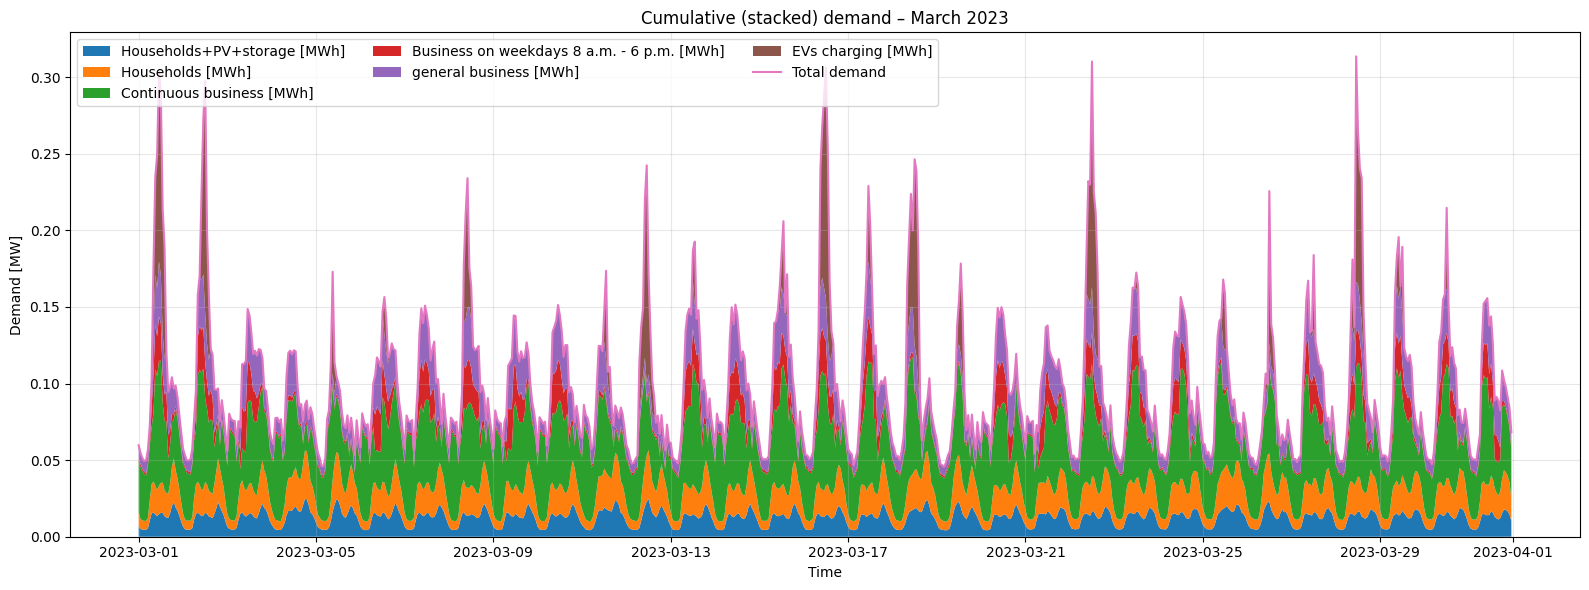

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


snapshots = pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h")


df_Tot_demand = pd.DataFrame({
    "Households+PV+storage [MWh]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"],
    "Households [MWh]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"],
    "Continuous business [MWh]":  tot_flex_load["tot_demand_flex_load_variants_[MWh]"]-dsm_p,
    "Business on weekdays 8 a.m. - 6 p.m. [MWh]": tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"],
    "general business [MWh]":  tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"],
    "EVs charging [MWh]":         Tot_EVs_charging["EVs demand [MWh]"],
}).reindex(snapshots).fillna(0).astype(float)

plt.figure(figsize=(16, 6))
plt.stackplot(df_Tot_demand.index, *(df_Tot_demand[col].values for col in df_Tot_demand.columns), labels=df_Tot_demand.columns)


total = df_Tot_demand.sum(axis=1)
plt.plot(df_Tot_demand.index, total, linewidth=1.5, label="Total demand")

plt.title("Cumulative (stacked) demand – March 2023")
plt.xlabel("Time")
plt.ylabel("Demand [MW]")
plt.legend(loc="upper left", ncol=3)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


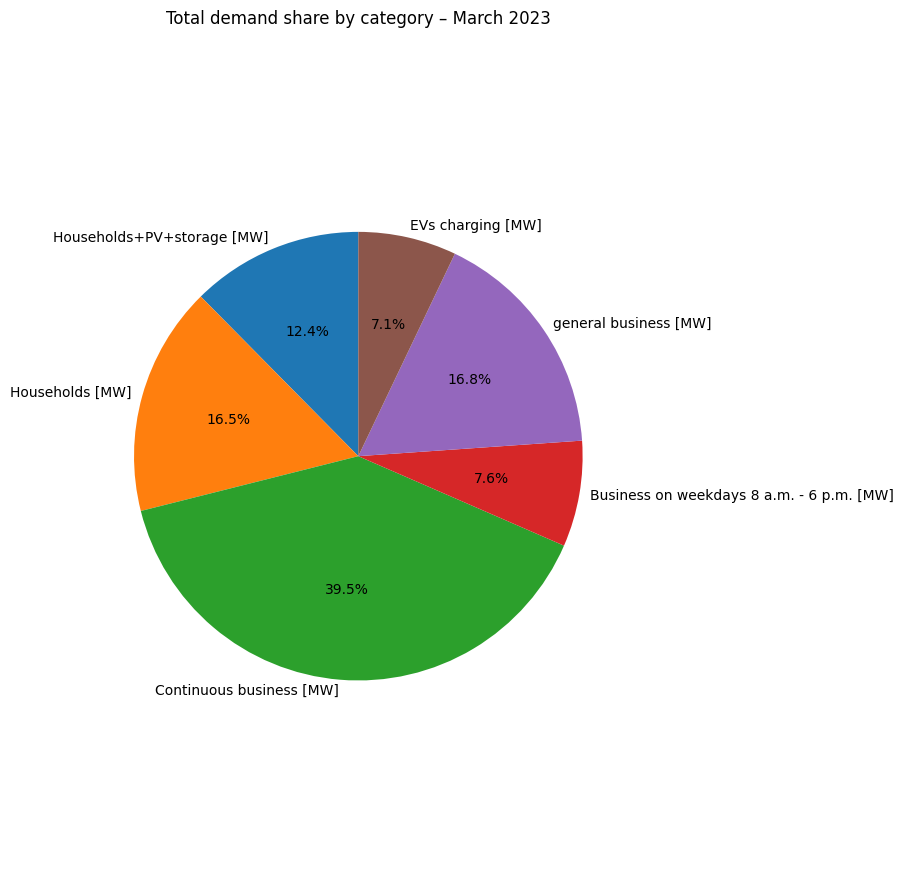

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

snapshots = pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h")

series_map = {
    "Households+PV+storage [MW]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Households [MW]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Continuous business [MW]":   tot_flex_load["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Business on weekdays 8 a.m. - 6 p.m. [MW]": tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"].reindex(snapshots).fillna(0),
    "general business [MW]":      tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"].reindex(snapshots).fillna(0),
    "EVs charging [MW]":          Tot_EVs_charging["EVs demand [MWh]"].reindex(snapshots).fillna(0),
}

totals = pd.Series({k: v.sum() for k, v in series_map.items()})

plt.figure(figsize=(9, 9))
plt.pie(
    totals.values,
    labels=totals.index,
    autopct="%1.1f%%",     # percentages only
    startangle=90,
    pctdistance=0.60,      # move % closer to center
    labeldistance=1.05     # move labels slightly out
)
plt.axis("equal")
plt.title("Total demand share by category – March 2023")
plt.tight_layout()
plt.show()


In [32]:
df_rated_biomass = pd.DataFrame(
    0.06,
    index=snapshots,
    columns=["power[MW]"]
)

df_rated_solar = pd.DataFrame(
    solar_gen["power[W]"].values,
    index=snapshots,
    columns=["power[MW]"]
)


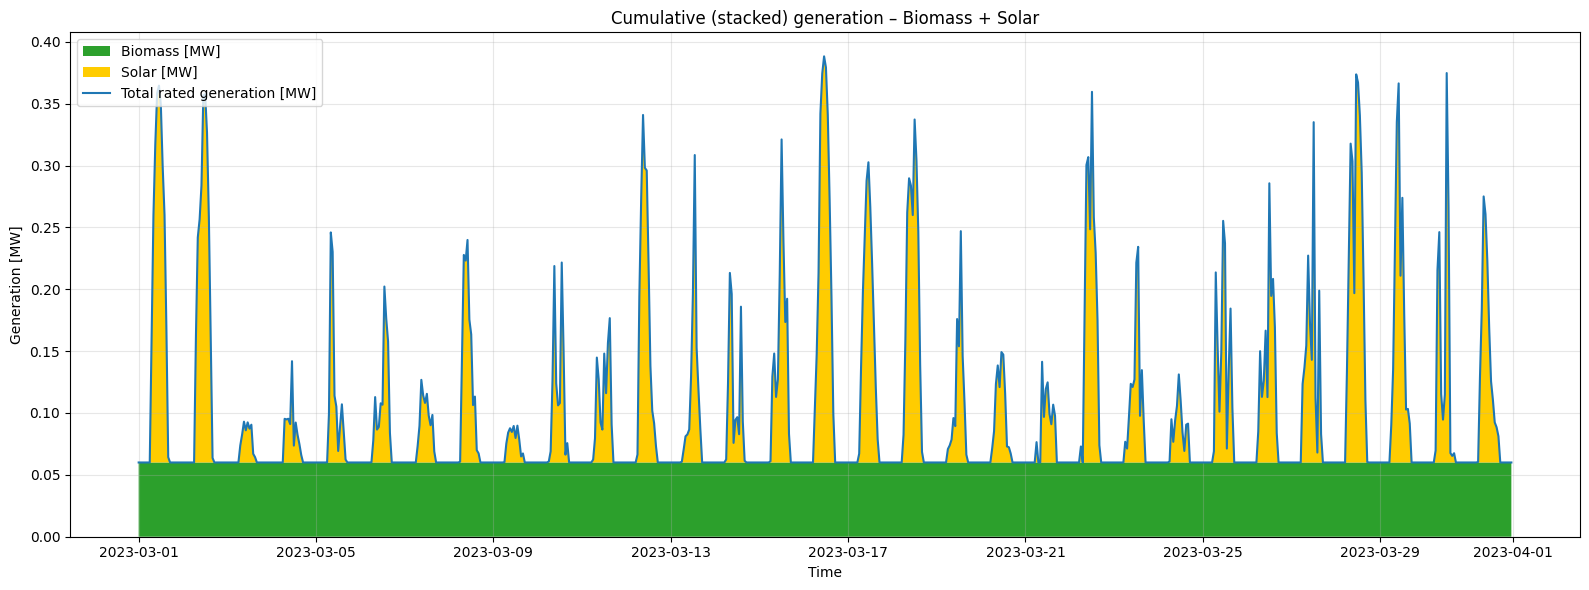

In [33]:
import matplotlib.pyplot as plt
import pandas as pd


df_dispatched_solar = net.generators_t.p["solar"]



df_rated_gen = pd.DataFrame({
    "Biomass [MW]": df_rated_biomass["power[MW]"],
    "Solar [MW]": df_rated_solar["power[MW]"]
})

plt.figure(figsize=(16, 6))
plt.stackplot(
    df_rated_gen.index,
    df_rated_gen["Biomass [MW]"].values,
    df_rated_gen["Solar [MW]"].values,
    labels=["Biomass [MW]", "Solar [MW]"],
    colors=["#2ca02c", "#ffcc00"]
)

total_gen = df_rated_gen.sum(axis=1)
plt.plot(df_rated_gen.index, total_gen, linewidth=1.5, label="Total rated generation [MW]")

plt.title("Cumulative (stacked) generation – Biomass + Solar")
plt.xlabel("Time")
plt.ylabel("Generation [MW]")
plt.legend(loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [34]:
import matplotlib.pyplot as plt

'''fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(tou_price, color='tab:blue', label="Electricity Price")
ax1.set_xlabel("Time")
ax1.set_ylabel("Electricity Price [€/MWh]", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(discharging_df, color='tab:orange', label="Discharging Power")
ax2.set_ylabel("Discharging Power [kW or MW]", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Electricity Price and EV Discharging – March")
fig.tight_layout()
plt.grid(True)
plt.show()

#display(discharging_df.sum())
#display(charging_df.sum())'''

'fig, ax1 = plt.subplots(figsize=(12, 5))\n\nax1.plot(tou_price, color=\'tab:blue\', label="Electricity Price")\nax1.set_xlabel("Time")\nax1.set_ylabel("Electricity Price [€/MWh]", color=\'tab:blue\')\nax1.tick_params(axis=\'y\', labelcolor=\'tab:blue\')\n\nax2 = ax1.twinx()\nax2.plot(discharging_df, color=\'tab:orange\', label="Discharging Power")\nax2.set_ylabel("Discharging Power [kW or MW]", color=\'tab:orange\')\nax2.tick_params(axis=\'y\', labelcolor=\'tab:orange\')\n\nplt.title("Electricity Price and EV Discharging – March")\nfig.tight_layout()\nplt.grid(True)\nplt.show()\n\n#display(discharging_df.sum())\n#display(charging_df.sum())'

In [35]:
charging_df["total_charging"].sum()+ Charging_df["total_Charging"].sum() + CHarging_df["total_CHarging"].sum()

np.float64(5.3107195334154715)

In [36]:
charging_df["total_charging"].loc["2023-03-06 13:00:00"]#+Charging_df["total_Charging"].loc["2023-03-06 13:00:00"]+CHarging_df["total_CHarging"].loc["2023-03-06 13:00:00"]

np.float64(0.0)

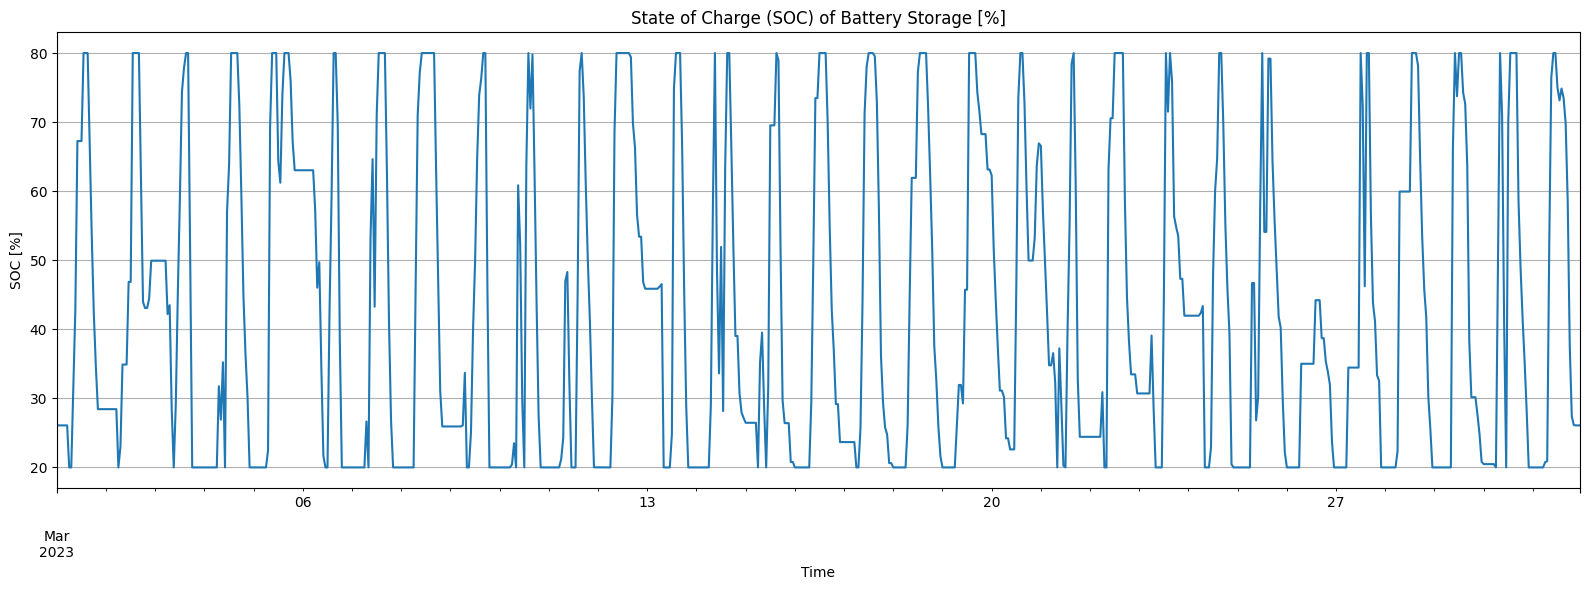

In [37]:
battery_capacity_mwh = net.stores.loc["battery_storage", "e_nom"]

# SOC in percentage
soc_percent = net.stores_t.e["battery_storage"] / battery_capacity_mwh * 100

# Plot
plt.figure(figsize=(16, 6))
soc_percent.plot()
plt.title("State of Charge (SOC) of Battery Storage [%]")
plt.ylabel("SOC [%]")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

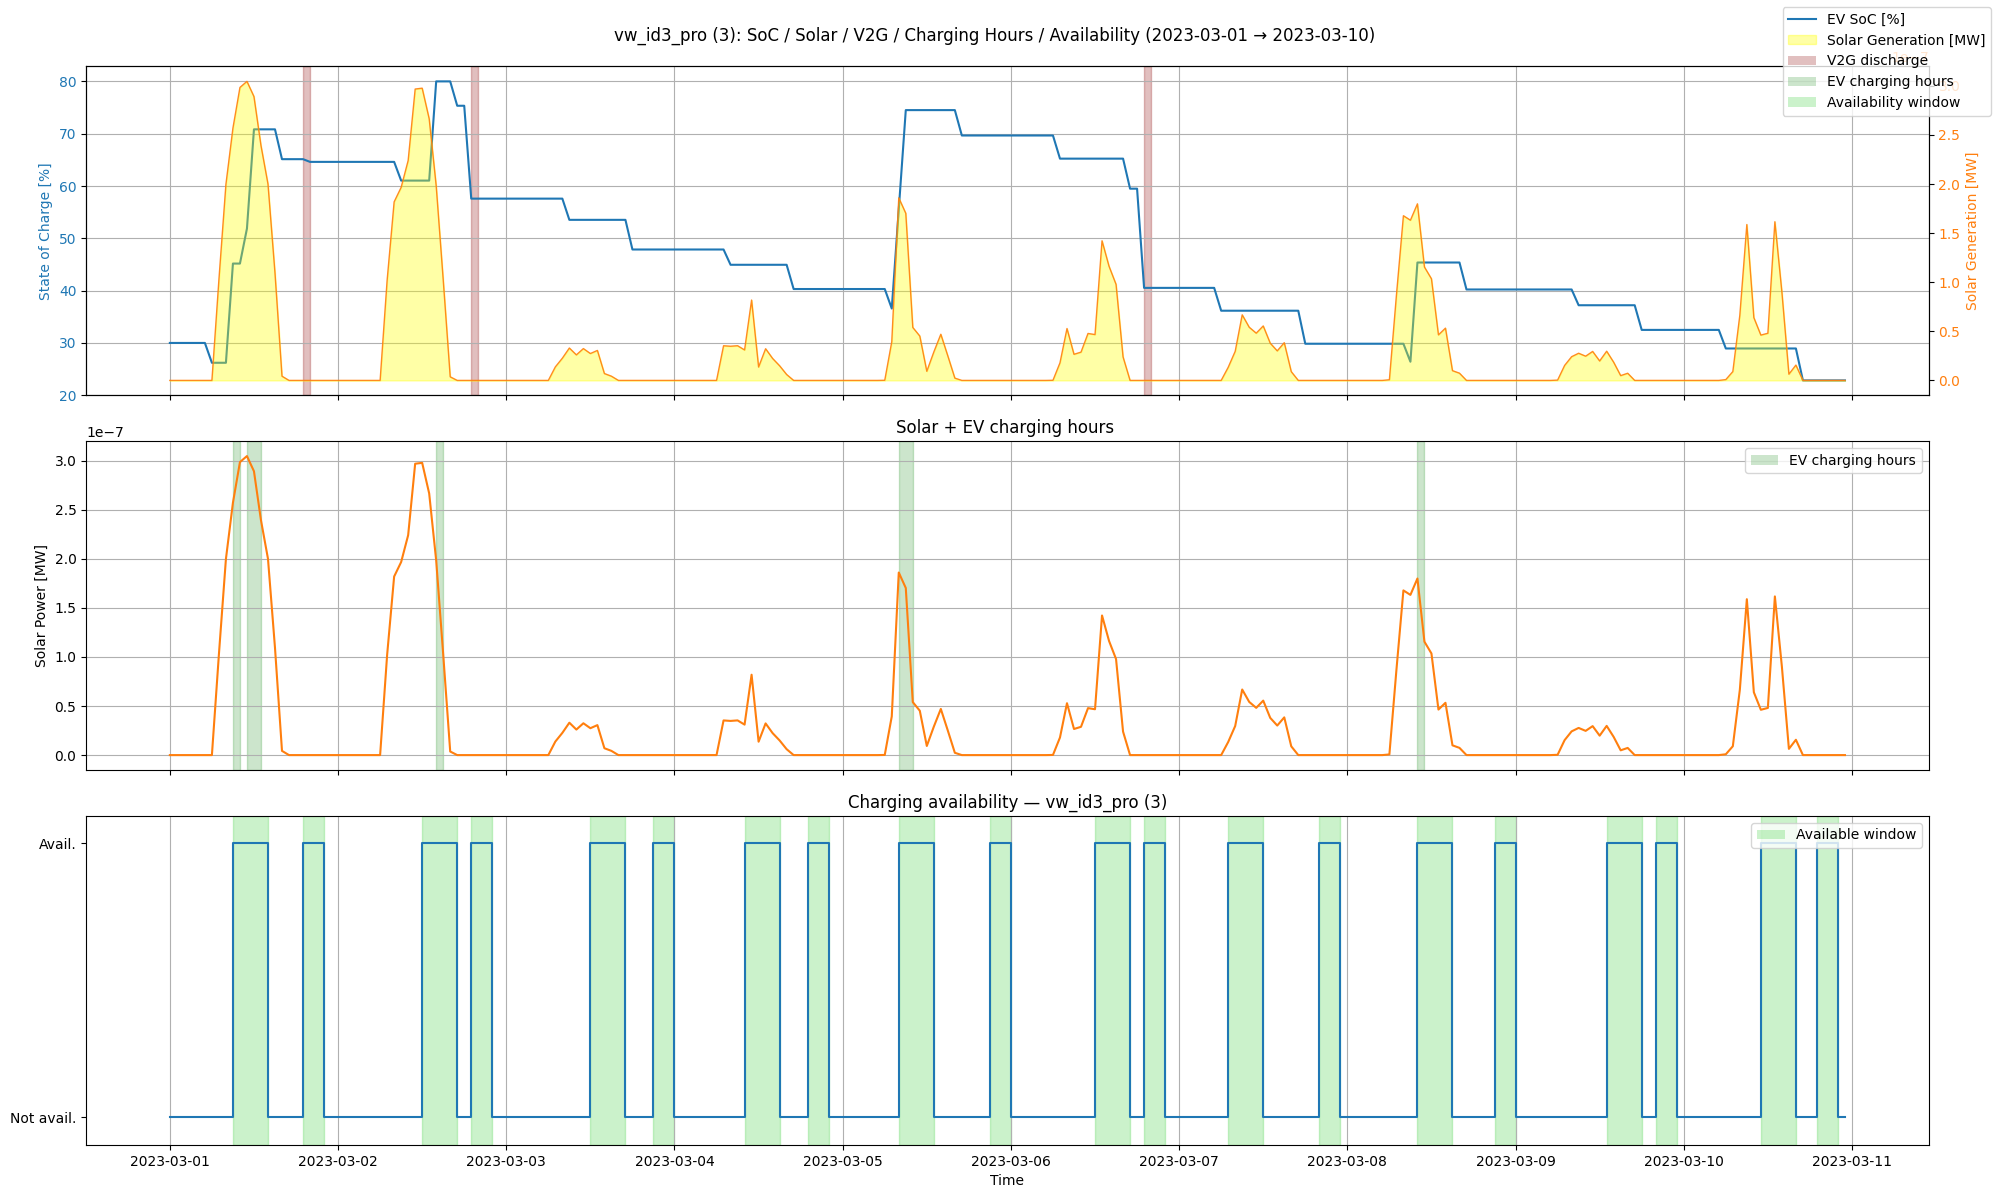

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

# -----------------------
# Common settings / data
# -----------------------
ev_name = "vw_id3_pro (3)"   # <- adjust as needed
ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
store_id = f"{ev_id}_store"

battery_capacity = battery_df.loc[ev_name, "e_nom_MWh"]
soc_percent = (net.stores_t.e[store_id] / battery_capacity) * 100
solar_power_mw = solar_gen["power[W]"] / 1e6

# Availability CSV already loaded by you as:
# availability_profiles = pd.read_csv("availability_profiles_3.csv", index_col=0, parse_dates=True)

start = "2023-03-01"
end   = "2023-03-10"

soc_week   = soc_percent.loc[start:end]
solar_week = solar_power_mw.loc[start:end]
avail_week = availability_profiles[ev_name].loc[start:end].astype(int)

# Discharge (V2G) from solution or fallback
tol = 1e-6
try:
    discharge = model.solution[f"{ev_id}_p_minus"].to_series()
except KeyError:
    link_v2g = f"{ev_id}_discharge"
    if link_v2g in net.links_t.p0.columns:
        discharge = net.links_t.p0[link_v2g].clip(lower=0)
    elif link_v2g in net.links_t.p1.columns:
        discharge = (-net.links_t.p1[link_v2g]).clip(lower=0)
    else:
        raise KeyError(f"Can't find {ev_id}_p_minus or link {link_v2g} in results.")
discharge_week = discharge.loc[start:end]

# Charging hours from THIS EV's store power (s < 0)
store_power = net.stores_t.p[store_id]
neg_times_all = store_power.index[store_power < 0]
neg_in_window = neg_times_all[(neg_times_all >= pd.Timestamp(start)) & (neg_times_all <= pd.Timestamp(end))]

# Helper: merge contiguous stamps into spans
def contiguous_spans(times_or_series, step="1H"):
    """Accepts a DatetimeIndex (times) OR a 0/1 Series; returns list of (start, end)."""
    step = pd.Timedelta(step)
    if isinstance(times_or_series, (pd.Series, pd.DataFrame)):
        on = times_or_series[times_or_series == 1]
        if on.empty:
            return []
        times = on.index.sort_values()
    else:
        times = pd.to_datetime(pd.Index(times_or_series)).sort_values()
        if len(times) == 0:
            return []
    starts, ends = [times[0]], []
    for prev, curr in zip(times[:-1], times[1:]):
        if curr - prev > step:
            ends.append(prev + step)
            starts.append(curr)
    ends.append(times[-1] + step)
    return list(zip(starts, ends))

charge_spans = contiguous_spans(neg_in_window, step="1h")    # from s<0
avail_spans  = contiguous_spans(avail_week,  step="1h")      # from availability 0/1

# -----------------------
# Plot: three rows, shared x
# -----------------------
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 12), sharex=True)

# ===== 1) Top: SoC + Solar (twin y) + V2G shading =====
line_soc, = ax1.plot(soc_week.index, soc_week, label="EV SoC [%]", color="tab:blue")
ax1.set_ylabel("State of Charge [%]", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True)

ax1b = ax1.twinx()
ax1b.plot(solar_week.index, solar_week, color="tab:orange", alpha=0.9, linewidth=1, label="_nolegend_")
solar_fill = ax1b.fill_between(solar_week.index, solar_week, 0, color="yellow", alpha=0.35,
                               label="Solar Generation [MW]", zorder=1)
ax1b.set_ylabel("Solar Generation [MW]", color="tab:orange")
ax1b.tick_params(axis="y", labelcolor="tab:orange")

# V2G discharge shaded on top subplot (dark red)
mask = discharge_week > tol
if mask.any():
    edges = mask.astype(int).diff().fillna(0)
    starts = list(discharge_week.index[edges == 1])
    ends   = list(discharge_week.index[edges == -1])
    if mask.iloc[0]:
        starts = [discharge_week.index[0]] + starts
    if mask.iloc[-1]:
        ends = ends + [discharge_week.index[-1]]
    for sps, eps in zip(starts, ends):
        ax1.axvspan(sps, eps, color="darkred", alpha=0.25, zorder=0)
    discharge_patch = Patch(facecolor="darkred", alpha=0.25, label="V2G discharge")
else:
    discharge_patch = None

# ===== 2) Middle: Solar with charging hours (from s<0) =====
ax2.plot(solar_week.index, solar_week, color="tab:orange", label="Solar Power [MW]")
for sps, eps in charge_spans:
    ax2.axvspan(sps, eps, color="green", alpha=0.2, zorder=0)
charge_patch = Patch(facecolor="green", alpha=0.2, label="EV charging hours")

ax2.set_ylabel("Solar Power [MW]")
ax2.set_title("Solar + EV charging hours ")
ax2.grid(True)
ax2.legend(handles=[charge_patch], loc="upper right", frameon=True)

# ===== 3) Bottom: Availability (0/1) with green bands =====
ax3.step(avail_week.index, avail_week, where="post", linewidth=1.5, label="Availability (0/1)")
for sps, eps in avail_spans:
    ax3.axvspan(sps, eps, color="limegreen", alpha=0.25, zorder=0)
ax3.set_ylim(-0.1, 1.1)
ax3.set_yticks([0, 1]); ax3.set_yticklabels(["Not avail.", "Avail."])
ax3.set_xlabel("Time")
ax3.set_title(f"Charging availability — {ev_name}")
ax3.grid(True, axis="x")
ax3.legend(handles=[Patch(facecolor="limegreen", alpha=0.25, label="Available window")],
           loc="upper right", frameon=True)

# ----- Title + combined legend -----
fig.suptitle(f"{ev_name}: SoC / Solar / V2G / Charging Hours / Availability ({start} → {end})")

handles1, labels1 = ax1.get_legend_handles_labels()
handles1b, labels1b = ax1b.get_legend_handles_labels()
handles = handles1 + handles1b
labels  = labels1 + labels1b
if discharge_patch is not None:
    handles.append(discharge_patch)
    labels.append("V2G discharge")
handles.append(Patch(facecolor="green", alpha=0.2)); labels.append("EV charging hours")
handles.append(Patch(facecolor="limegreen", alpha=0.25)); labels.append("Availability window")

fig.legend(handles, labels, loc="upper right", frameon=True)

fig.tight_layout()
plt.show()


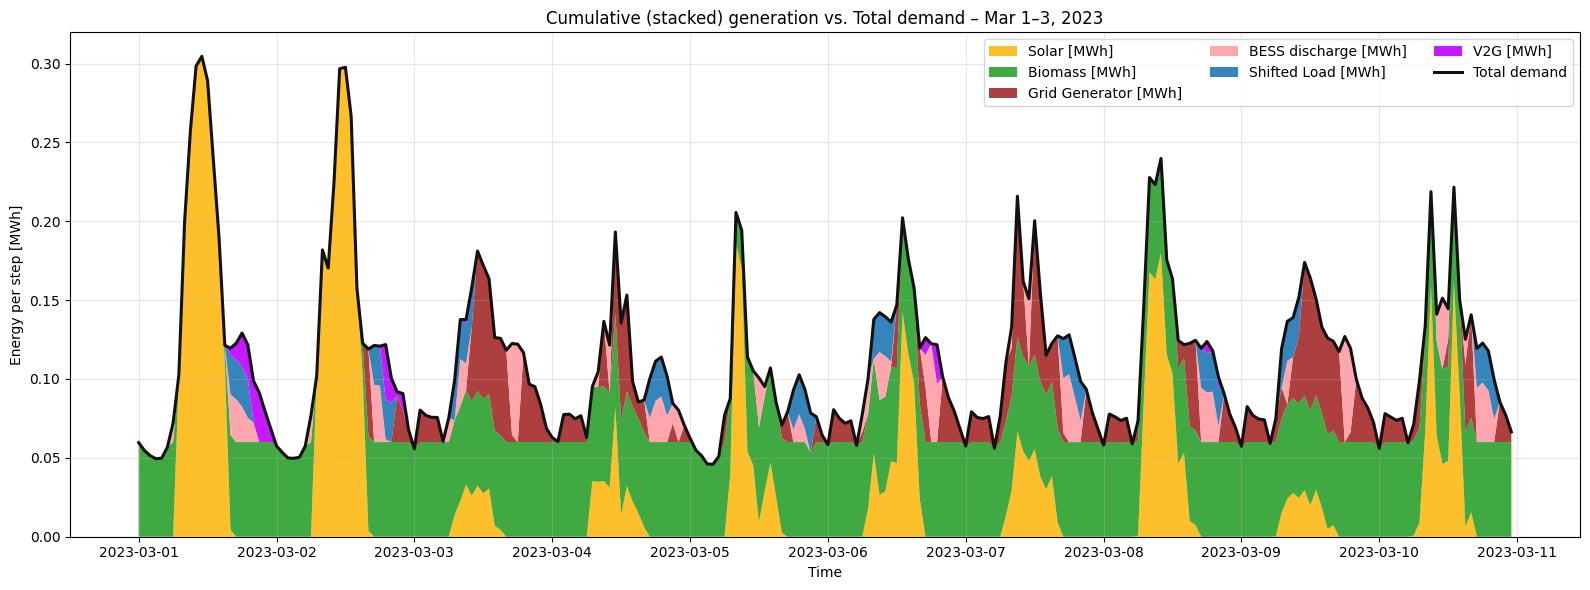

In [39]:
snapshots = pd.date_range("2023-03-01 00:00", "2023-03-10 23:00", freq="h")

solar   = net.generators_t.p["solar"].reindex(snapshots).fillna(0).astype(float)
biomass = net.generators_t.p["Biomass"].reindex(snapshots).fillna(0).astype(float)
grid    = net.generators_t.p["grid_generator"].reindex(snapshots).fillna(0).astype(float)
EVs_discharge  = Tot_EVs_discharging["EVs discharging [MW]"].reindex(snapshots).fillna(0).astype(float)


store_p = net.stores_t.p["battery_storage"].reindex(snapshots).fillna(0).astype(float)
bess_discharge = store_p.clip(lower=0)          # to generation
batt_charging  = (-store_p).clip(lower=0)  # to demand

Store_p = net.stores_t.p["DSM"].reindex(snapshots).fillna(0).astype(float)
Bess_discharge = Store_p.clip(lower=0)          # to generation
Batt_charging  = (-Store_p).clip(lower=0) 

df_gen_stack = pd.DataFrame({
    "Solar [MWh]":          solar,
    "Biomass [MWh]":        biomass,
    "Grid Generator [MWh]": grid,
    "BESS discharge [MWh]": bess_discharge,
    "Shifted Load [MWh]": Bess_discharge,
    "V2G [MWh]" : EVs_discharge
}).astype(float)

df_Tot_demand = pd.DataFrame({
    "Households+PV+storage [MWh]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"].reindex(snapshots),
    "Households [MWh]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"].reindex(snapshots),
    "Continuous business [MWh]":   tot_flex_load["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots),
    #"Continuous business(shifted) [MWh]": df_shifted_load_target["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots),
    "Business 8–18 [MWh]":         tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"].reindex(snapshots),
    "General business [MWh]":      tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"].reindex(snapshots),
    "EVs charging [MWh]":          Tot_EVs_charging["EVs demand [MWh]"].reindex(snapshots),
    "Central Battery charging [MWh]":      batt_charging,
    "Battery charging DSM [MWh]":      Batt_charging,
}).fillna(0).astype(float)

total_demand = df_Tot_demand.sum(axis=1)


gen_colors = {
    "Solar [MWh]":          "#FDB813",   # sunny yellow
    "Biomass [MWh]":        "#2CA02C",   # warm orange
    "Grid Generator [MWh]": "#A52A2A",   # green
    "BESS discharge [MWh]": "#FF9DA6",# red
    "Shifted Load [MWh]": "#1f77b4",
    "V2G [MWh]": "#BF00FF",
}
cols = list(df_gen_stack.columns)
plt.figure(figsize=(16,6))
plt.stackplot(
    df_gen_stack.index,
    *(df_gen_stack[c].values for c in cols),
    labels=cols,
    colors=[gen_colors[c] for c in cols],
    alpha=0.9,
)
plt.plot(total_demand.index, total_demand, color="#111111", lw=2.2, label="Total demand")
plt.legend(loc="upper left", ncol=3); plt.grid(True, alpha=0.3)


plt.title("Cumulative (stacked) generation vs. Total demand – Mar 1–3, 2023")
plt.xlabel("Time"); plt.ylabel("Energy per step [MWh]")
plt.legend(loc="upper right", ncol=3); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()


In [40]:
bess_discharge.sum()

np.float64(1.48944401968601)

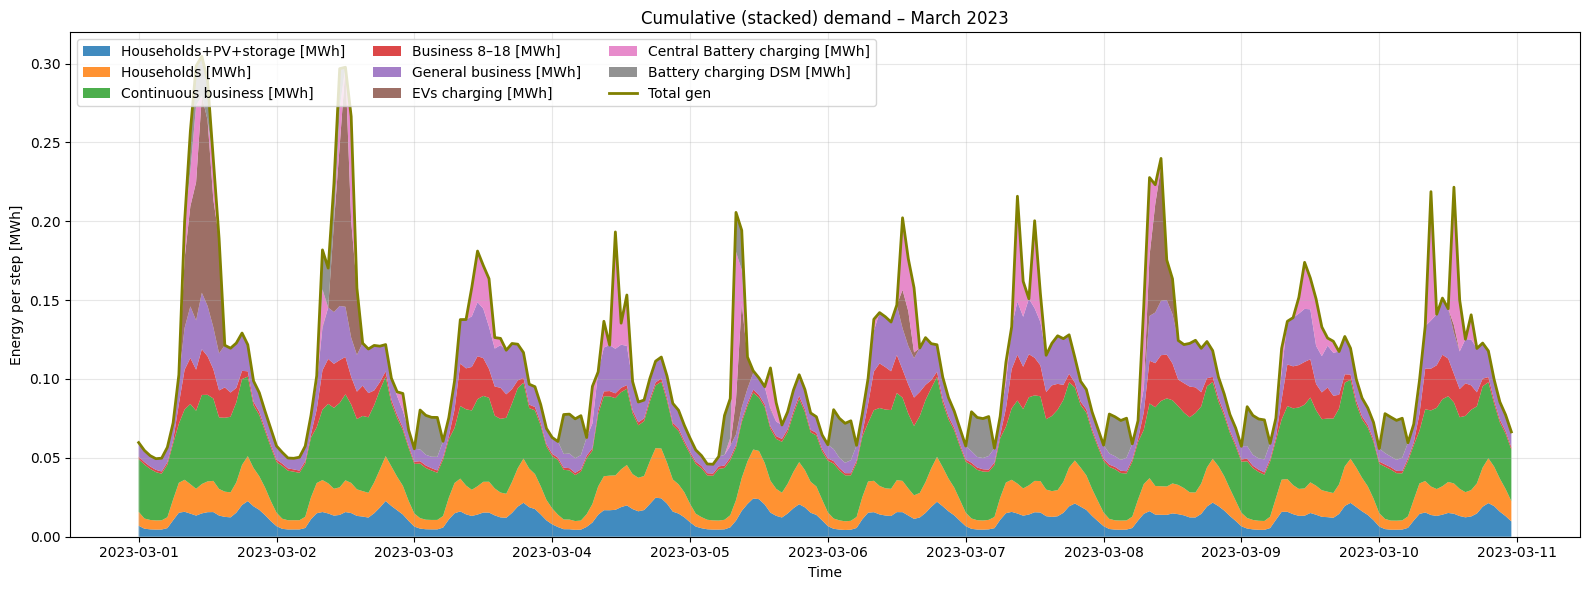

In [41]:


solar   = net.generators_t.p["solar"].reindex(snapshots).fillna(0).astype(float)
biomass = net.generators_t.p["Biomass"].reindex(snapshots).fillna(0).astype(float)
grid    = net.generators_t.p["grid_generator"].reindex(snapshots).fillna(0).astype(float)
#EVs_discharge  = discharging_df["total_discharging"].reindex(snapshots).fillna(0)

store_p = net.stores_t.p["battery_storage"].reindex(snapshots).fillna(0).astype(float)
bess_discharge = store_p.clip(lower=0)
batt_charging  = (-store_p).clip(lower=0)

total_gen = (solar + biomass + grid + bess_discharge+ Bess_discharge + EVs_discharge).astype(float)
df_total_generation = pd.DataFrame({"Total Generation [MWh]": total_gen})

df_Tot_demand = pd.DataFrame({
    "Households+PV+storage [MWh]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"].reindex(snapshots),
    "Households [MWh]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"].reindex(snapshots),
    "Continuous business [MWh]":   tot_flex_load["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots),
    #"Continuous business(shifted) [MWh]": df_shifted_load_target["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots),
    "Business 8–18 [MWh]":         tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"].reindex(snapshots),
    "General business [MWh]":      tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"].reindex(snapshots),
    "EVs charging [MWh]":          Tot_EVs_charging["EVs demand [MWh]"].reindex(snapshots),
    "Central Battery charging [MWh]":      batt_charging,
    "Battery charging DSM [MWh]":      Batt_charging,
}).fillna(0).astype(float)

plt.figure(figsize=(16, 6))
plt.stackplot(df_Tot_demand.index,
              *(df_Tot_demand[c].values for c in df_Tot_demand.columns),
              labels=df_Tot_demand.columns, alpha=0.85)

plt.plot(df_total_generation.index,
         df_total_generation["Total Generation [MWh]"],
         linewidth=2, label="Total gen", color="olive")

plt.title("Cumulative (stacked) demand – March 2023")
plt.xlabel("Time"); plt.ylabel("Energy per step [MWh]")
plt.legend(loc="upper left", ncol=3); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()


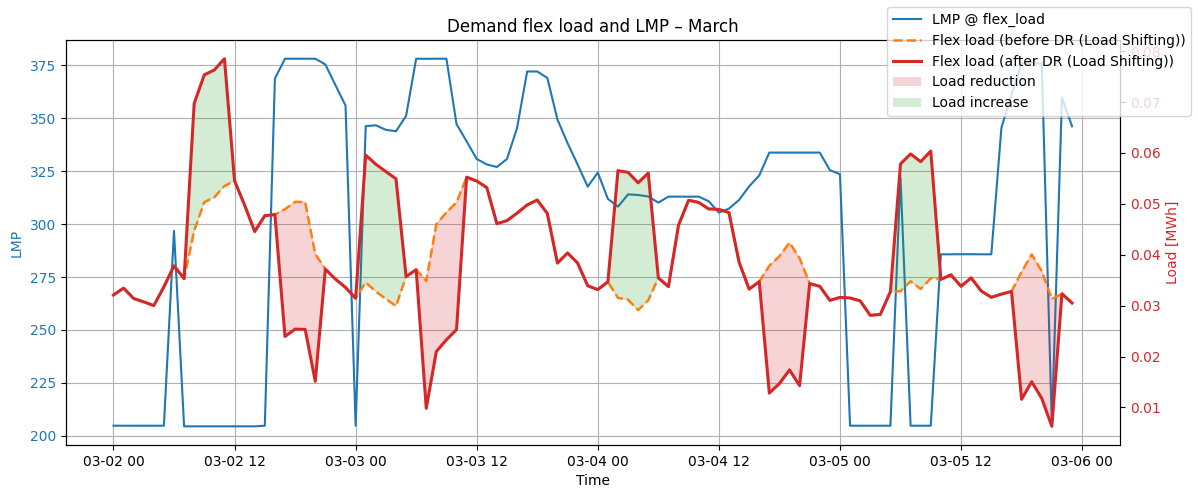

In [42]:
fig, ax1 = plt.subplots(figsize=(12, 5))
start = "2023-03-02"
end   = "2023-03-05"

# LMP (left axis)
lmp = net.buses_t.marginal_price["flex_load"].loc[start:end]
ax1.plot(lmp.index, lmp, color="tab:blue", label="LMP @ flex_load")
ax1.set_xlabel("Time")
ax1.set_ylabel("LMP", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True, which="both", axis="both")

# Original and shifted loads (right axis)
orig = tot_flex_load["tot_demand_flex_load_variants_[MWh]"].loc[start:end]
dsm_aligned = dsm_fixed.reindex(orig.index).fillna(0)
new_flex = (orig - dsm_aligned)

ax2 = ax1.twinx()
line_orig, = ax2.plot(orig.index, orig, color="tab:orange", linestyle="--", linewidth=1.8,
                      label="Flex load (before DR (Load Shifting))")
line_new,  = ax2.plot(new_flex.index, new_flex, color="tab:red", linewidth=2.2,
                      label="Flex load (after DR (Load Shifting))")
ax2.set_ylabel("Load [MWh]", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Masks for reduction/increase
reduced_mask  = (orig > new_flex)
increase_mask = (new_flex > orig)

# Shaded areas
reduction_patch = None
increase_patch  = None

if reduced_mask.any():
    ax2.fill_between(
        orig.index, orig, new_flex,
        where=reduced_mask, interpolate=True,
        color="tab:red", alpha=0.2
    )
    reduction_patch = Patch(facecolor="tab:red", alpha=0.2, label="Load reduction")

if increase_mask.any():
    ax2.fill_between(
        orig.index, orig, new_flex,
        where=increase_mask, interpolate=True,
        color="tab:green", alpha=0.2
    )
    increase_patch = Patch(facecolor="tab:green", alpha=0.2, label="Load increase")

plt.title("Demand flex load and LMP – March")

# Legend (lines + shaded area patches)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
handles = lines1 + lines2
labels  = labels1 + labels2

if reduction_patch is not None:
    handles.append(reduction_patch)
    labels.append("Load reduction")
if increase_patch is not None:
    handles.append(increase_patch)
    labels.append("Load increase")

fig.legend(handles, labels, loc="upper right", frameon=True)

fig.tight_layout()
plt.show()

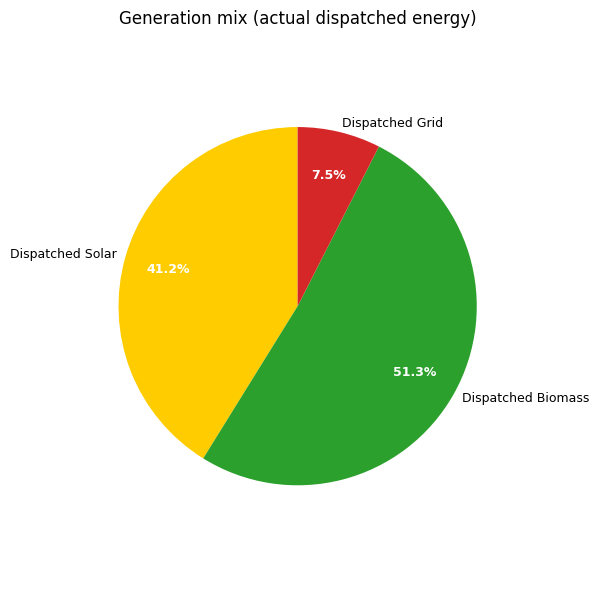

In [43]:
import matplotlib.pyplot as plt

# --- Supply breakdown (totals over the window; 1-hour steps ≈ MWh) ---
right_solar   = net.generators_t.p["solar"].sum()
right_biomass = net.generators_t.p["Biomass"].sum()
right_grid    = net.generators_t.p["grid_generator"].sum()

right_labels = ["Dispatched Solar", "Dispatched Biomass", "Dispatched Grid"]
right_sizes  = [right_solar, right_biomass, right_grid]
right_colors = ["#ffcc00", "#2ca02c", "#d62728"]  # yellow, green, red

# drop zero slices to avoid clutter
labels, sizes, colors = zip(*[(L,S,C) for L,S,C in zip(right_labels, right_sizes, right_colors) if S > 0])

# --- Plot single pie ---
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, colors=colors,
    autopct="%1.1f%%", startangle=90, pctdistance=0.75, labeldistance=1.05
)
ax.axis("equal")
ax.set_title("Generation mix (actual dispatched energy)")

# styling
for t in autotexts:
    t.set_color("white"); t.set_fontweight("bold"); t.set_fontsize(9)
for t in texts:
    t.set_fontsize(9)

plt.tight_layout()
plt.show()


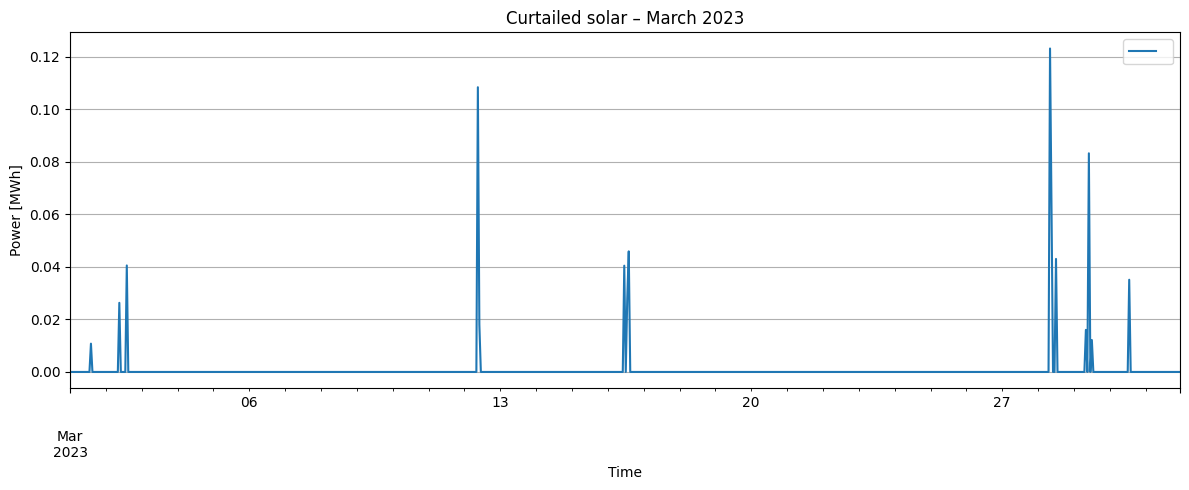

np.float64(0.69320582448652)

In [44]:
start1= "2023-03-01 00:00:00"
end1 =  "2023-03-31 23:00:00"
solar_Curtailment=(solar_gen["power[W]"]-net.generators_t.p["solar"])

plt.figure(figsize=(12, 5))
solar_Curtailment.loc[start1:end1].plot(legend=True)
plt.title("Curtailed solar – March 2023")
plt.xlabel("Time")
plt.ylabel("Power [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
display(solar_Curtailment.sum())

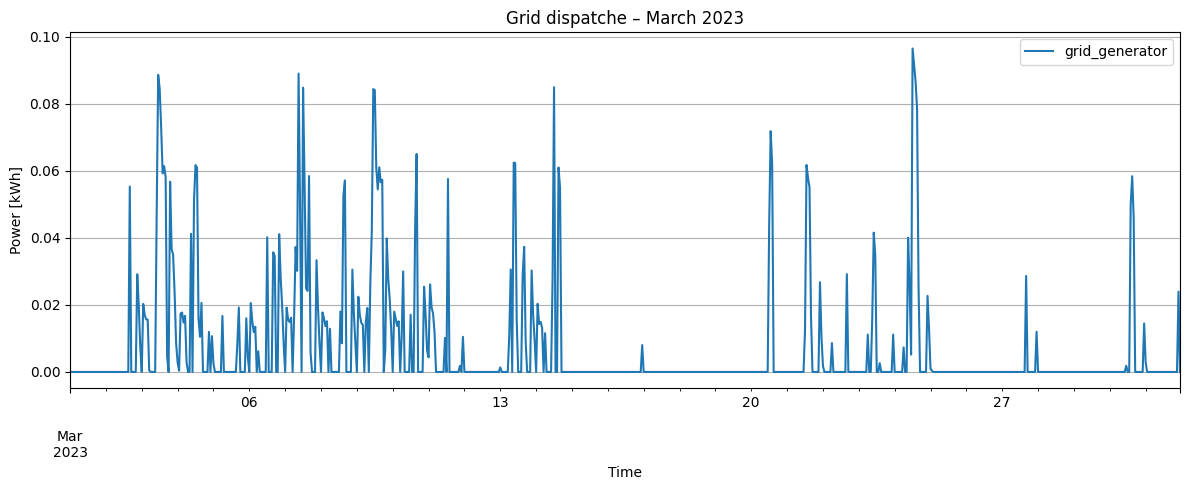

Timestamp('2023-03-24 12:00:00')

In [45]:
plt.figure(figsize=(12, 5))
net.generators_t.p["grid_generator"].loc[start1:end1].plot(legend=True)
plt.title("Grid dispatche – March 2023")
plt.xlabel("Time")
plt.ylabel("Power [kWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
net.generators_t.p["grid_generator"].idxmax()

<Axes: title={'center': 'total Flex Load'}, xlabel='snapshot'>

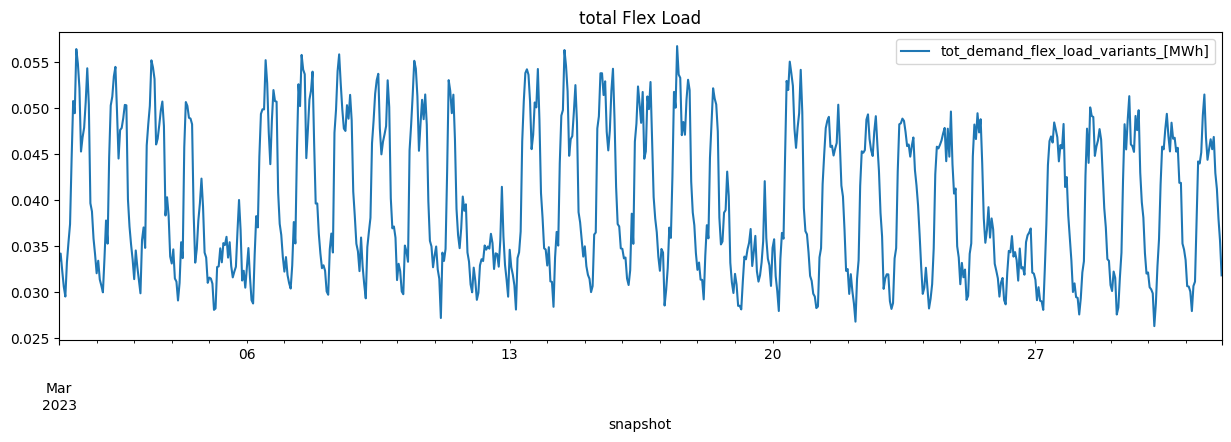

In [46]:
tot_flex_load.loc[start1:end1].plot(figsize=(15, 4), title="total Flex Load")

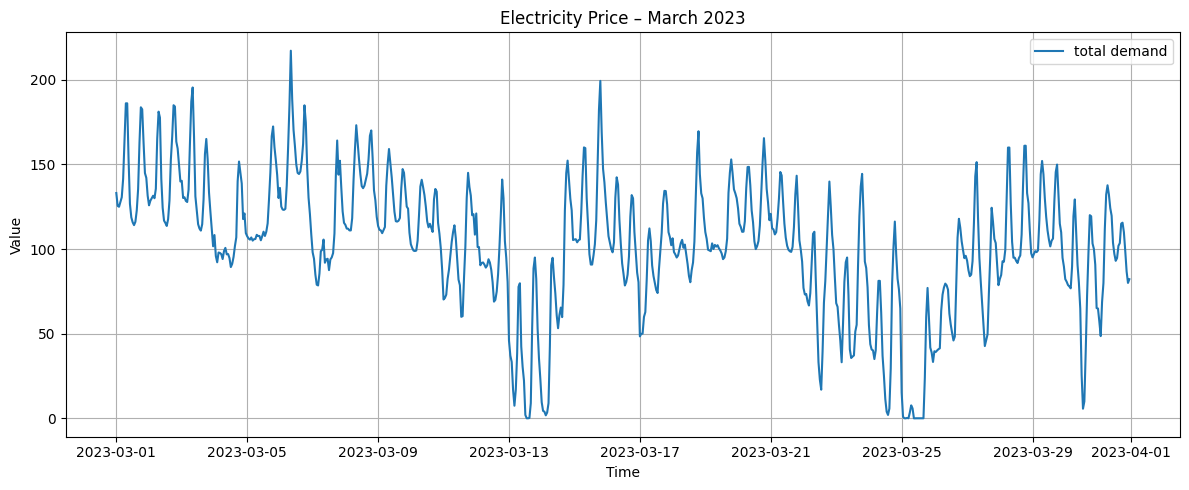

E_price    102.518454
dtype: float64

In [47]:
Tou_price = pd.read_csv("electricity_price_march_2023.csv", header=None, names=["E_price"])
tou_Price = Tou_price[::8].copy()

tou_Price.loc[len(tou_Price)] = 82.19
tou_price = tou_Price.reset_index(drop=True)

tou_price.index = net.snapshots
tou_price.loc[tou_price["E_price"] <= 0, "E_price"] = 0.1
 
plt.figure(figsize=(12, 5))
plt.plot(tou_price.loc[start1:end1],  label="total demand")
plt.title("Electricity Price – March 2023")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
#tou_price.max()
tou_price.mean()

<Axes: title={'center': 'total hourly grid import[MW]'}, xlabel='snapshot'>

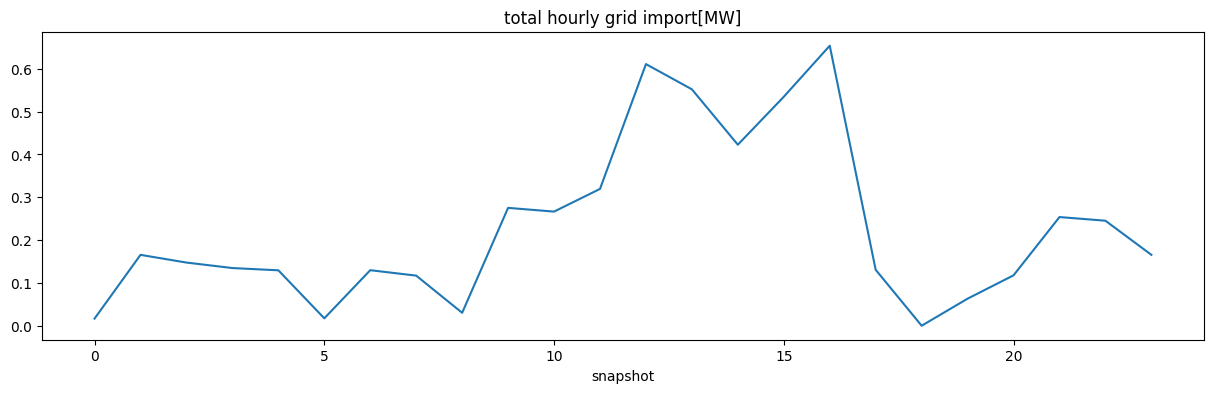

In [48]:
tot_hourly_grid_import= net.generators_t.p["grid_generator"].groupby(net.generators_t.p["grid_generator"].index.hour).sum()
tot_hourly_grid_import.plot(figsize=(15, 4), title="total hourly grid import[MW]")

# Locational Marginal Prices at each buses

In [49]:
start = "2023-03-02 06:00:00"
end = "2023-03-02 18:00:00"
df_LMP = net.buses_t.marginal_price.loc[start:end, ['grid', 'solar_bus', 'Biomass','flex_load', 'houshold','benz_eqe_300_1_bus']]
df_LMP

,grid,solar_bus,Biomass,flex_load,houshold,benz_eqe_300_1_bus
snapshot,,,,,,
2023-03-02 06:00:00,164.99,196.82,196.82,296.82,296.82,177.79143
2023-03-02 07:00:00,181.11,104.50,104.80,204.50,204.50,177.79143
2023-03-02 08:00:00,177.62,104.50,104.80,204.50,204.50,177.79143
2023-03-02 09:00:00,141.44,104.50,104.80,204.50,204.50,177.79143
2023-03-02 10:00:00,124.36,104.50,104.80,204.50,204.50,177.79143
2023-03-02 11:00:00,116.79,104.50,104.80,204.50,204.50,177.79143
2023-03-02 12:00:00,115.39,104.50,104.80,204.50,204.50,177.79143
2023-03-02 13:00:00,113.64,104.50,104.80,204.50,204.50,177.79143
2023-03-02 14:00:00,117.69,104.50,104.80,204.50,204.50,177.79143


In [50]:
idx = net.snapshots[(net.snapshots >= start) & (net.snapshots <= end)]

df_opf = pd.DataFrame(index=idx)
df_opf.index.name = "snapshot"

df_opf["Solar input [MW]"]      = (solar_gen["power[W]"].reindex(idx))
df_opf["Solar dispatch [MW]"]   = net.generators_t.p["solar"].reindex(idx)
df_opf["Biomass [MW]"]          = net.generators_t.p["Biomass"].reindex(idx)
df_opf["Grid generator [MW]"]   = net.generators_t.p["grid_generator"].reindex(idx)
df_opf["Battery power [MW]"]    = net.stores_t.p["battery_storage"].reindex(idx)   # (+ discharging to loads)
df_opf["Total demand [MWh]"]    = Tot_demand.reindex(idx)
df_opf["Battery SoC [MWh]"]     = net.stores_t.e["battery_storage"].reindex(idx)

display(df_opf)

,Solar input [MW],Solar dispatch [MW],Biomass [MW],Grid generator [MW],Battery power [MW],Total demand [MWh],Battery SoC [MWh]
snapshot,,,,,,,
2023-03-02 06:00:00,0.000000,0.000000,0.060000,0.000000,0.016868,0.076868,0.040000
2023-03-02 07:00:00,0.101984,0.101984,0.000000,0.000000,-0.005971,0.096013,0.045971
2023-03-02 08:00:00,0.181844,0.181844,0.000000,0.000000,-0.023818,0.133026,0.069789
2023-03-02 09:00:00,0.196604,0.170293,0.000000,0.000000,0.000000,0.145293,0.069789
2023-03-02 10:00:00,0.223948,0.223948,0.000000,0.000000,0.000000,0.198948,0.069789
2023-03-02 11:00:00,0.296728,0.296728,0.000000,0.000000,-0.023929,0.247799,0.093718
2023-03-02 12:00:00,0.297616,0.297616,0.000000,0.000000,0.000000,0.297616,0.093718
2023-03-02 13:00:00,0.266448,0.266448,0.000000,0.000000,-0.066282,0.200166,0.160000
2023-03-02 14:00:00,0.198176,0.157645,0.000000,0.000000,0.000000,0.157645,0.160000


# Revenue EVs

In [51]:
revenue_EV = (net.buses_t.marginal_price["bmw_i4_m50_2_bus"]*net.links_t.p0["bmw_i4_m50_2_charge"])+(net.buses_t.marginal_price["bmw_i4_m50_2_bus"]*net.links_t.p0["bmw_i4_m50_2_Charge"])+(net.buses_t.marginal_price["bmw_i4_m50_2_bus"]*net.links_t.p0["bmw_i4_m50_2_CHarge"])
revenue_EV.sum()

np.float64(62.675700706969664)

# Revenue Solar

In [52]:
revenue_solar = net.buses_t.marginal_price["solar_bus"]*net.generators_t.p["solar"]
revenue_solar.sum()

np.float64(3859.0528480211588)

# Revenue Flex Load

In [53]:
revenue_load = net.buses_t.marginal_price["flex_load"]*(tot_flex_load["tot_demand_flex_load_variants_[MWh]"]-net.stores_t.p["DSM"])
revenue_load.sum()

np.float64(7853.7717006402345)

# Revenue fixed Load

In [54]:
Revenue_load = net.buses_t.marginal_price["houshold"]*tot_Houshold["tot_demand_Houshold_variants_[MWh]"]
Revenue_load.sum()

np.float64(3411.4476301158347)

# Total system cost

In [55]:
total_cost = float(net.objective)
print(total_cost)

15642.452329122209


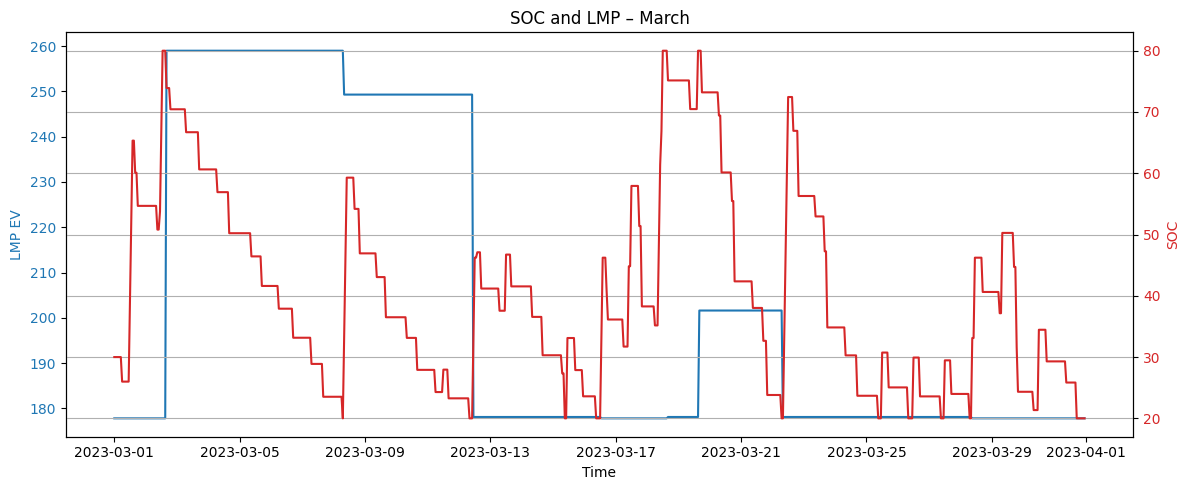

In [56]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 5))
start = "2023-03-01"
end = "2023-03-31"

# Left Y-axis: LMP Solar
ax1.plot(net.buses_t.marginal_price["bmw_i4_m50_2_bus"].loc[start:end], color='tab:blue', label="LMP Solar")
ax1.set_xlabel("Time")
ax1.set_ylabel("LMP EV", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ev_name = "bmw_i4_m50 (2)"
ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
store_id = f"{ev_id}_store"

battery_capacity = battery_df.loc[ev_name, "e_nom_MWh"]
soc_percent = (net.stores_t.e[store_id] / battery_capacity) * 100
ax2 = ax1.twinx()
ax2.plot(soc_percent.loc[start:end], color='tab:red', label="Grid Dispatch")
ax2.set_ylabel("SOC", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and layout
plt.title("SOC and LMP – March")
fig.tight_layout()
plt.grid(True)
plt.show()

In [57]:
s= net.stores_t.p["bmw_i4_m50_2_store"]
neg = s[s < 0]
neg_times = s.index[s < 0]
neg_times

DatetimeIndex(['2023-03-01 12:00:00', '2023-03-01 13:00:00',
               '2023-03-01 14:00:00', '2023-03-02 11:00:00',
               '2023-03-02 12:00:00', '2023-03-02 13:00:00',
               '2023-03-08 08:00:00', '2023-03-08 09:00:00',
               '2023-03-08 10:00:00', '2023-03-11 12:00:00',
               '2023-03-12 11:00:00', '2023-03-12 12:00:00',
               '2023-03-12 14:00:00', '2023-03-13 12:00:00',
               '2023-03-15 11:00:00', '2023-03-16 13:00:00',
               '2023-03-16 14:00:00', '2023-03-17 10:00:00',
               '2023-03-17 12:00:00', '2023-03-18 09:00:00',
               '2023-03-18 10:00:00', '2023-03-18 11:00:00',
               '2023-03-18 12:00:00', '2023-03-19 15:00:00',
               '2023-03-22 09:00:00', '2023-03-22 10:00:00',
               '2023-03-22 11:00:00', '2023-03-22 12:00:00',
               '2023-03-25 12:00:00', '2023-03-26 12:00:00',
               '2023-03-27 12:00:00', '2023-03-28 09:00:00',
               '2023-03-